2011
2012
2013
2014
error
2015
2016
2017
2018
2019
2020
2021


/home/ali/.local/lib/python3.8/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


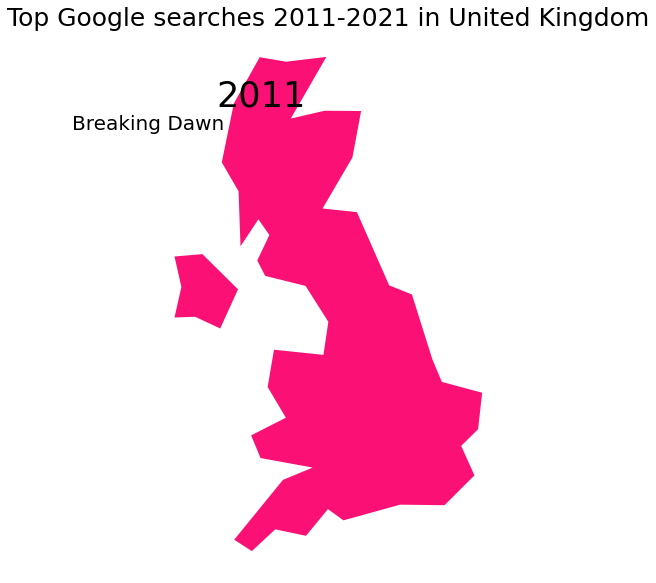

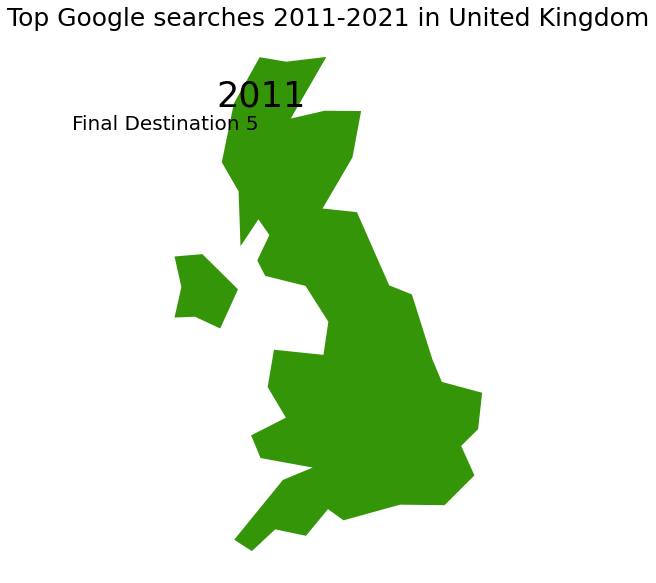

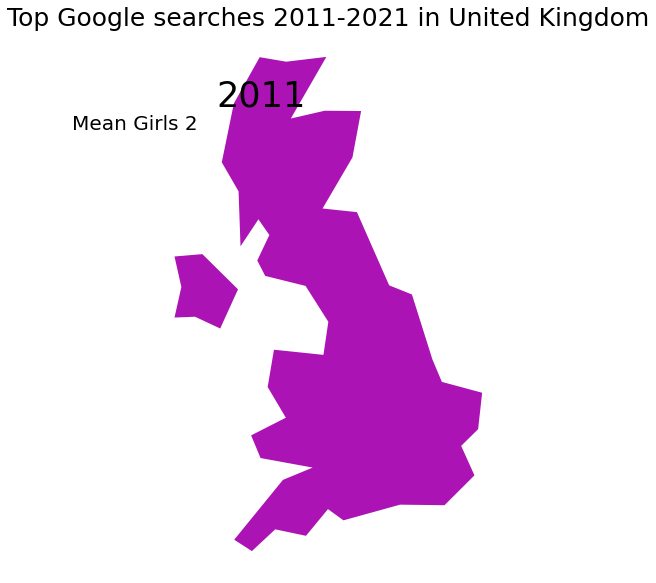

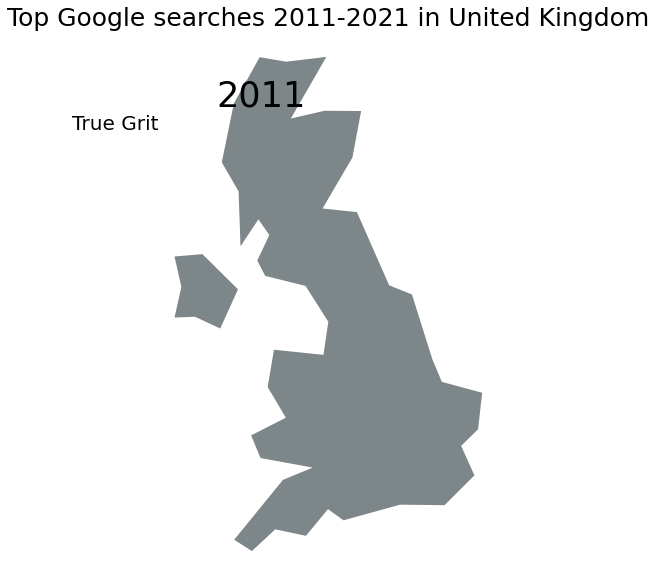

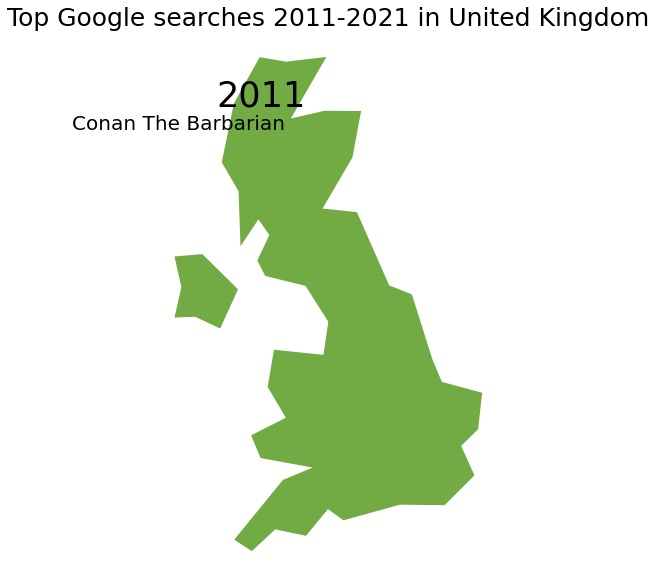

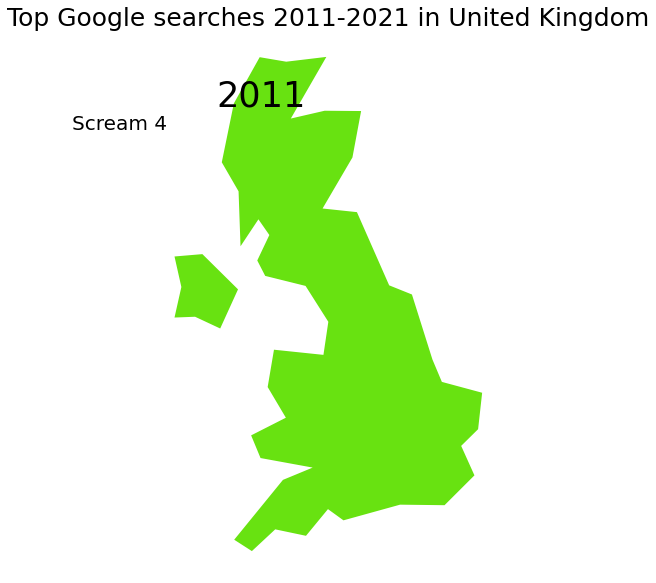

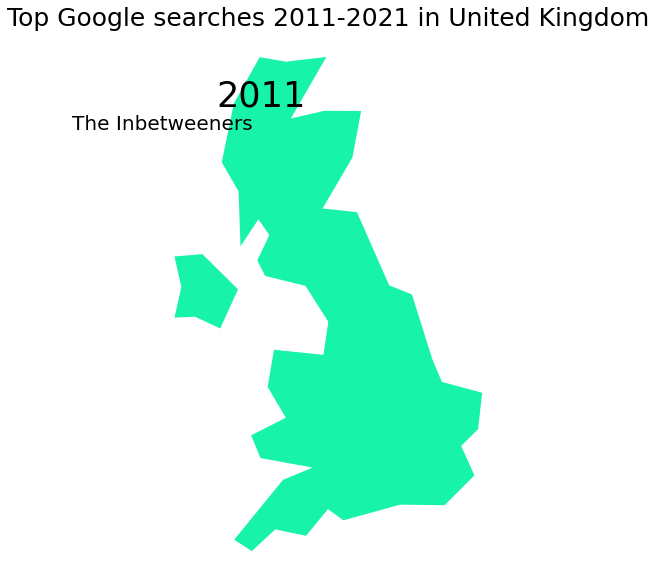

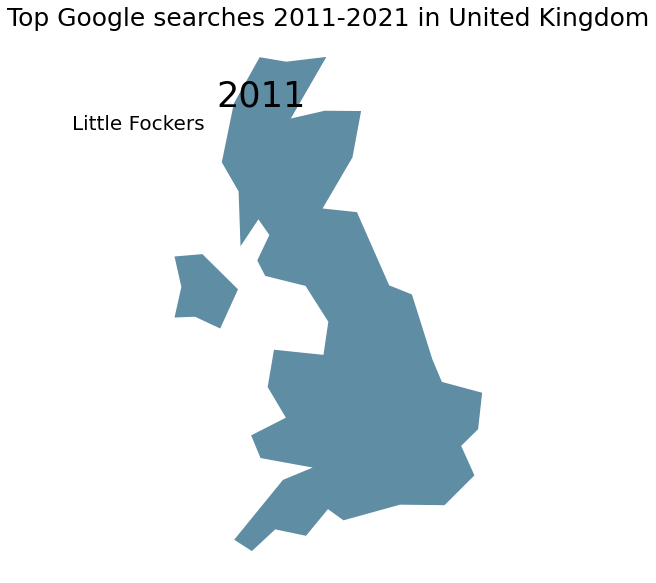

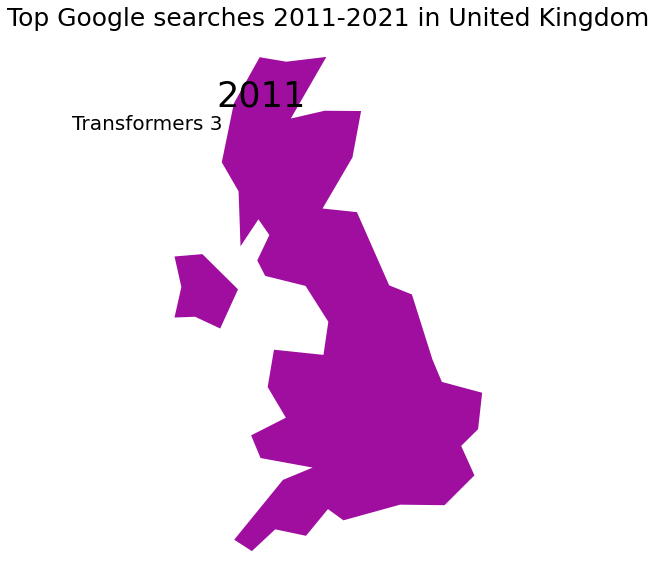

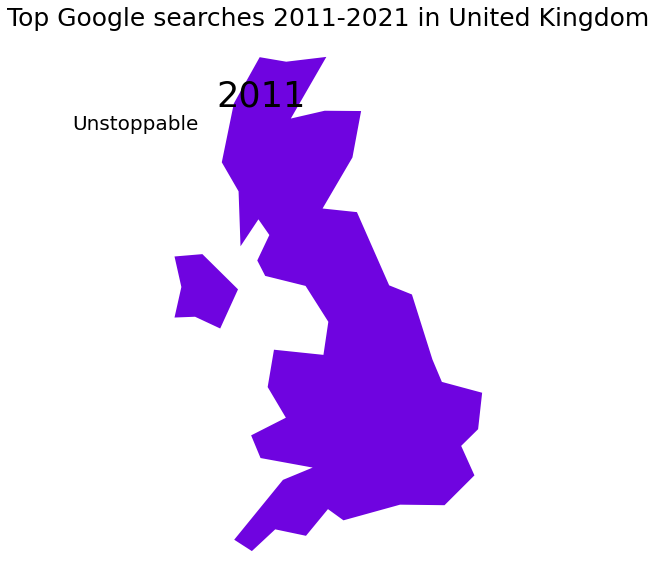

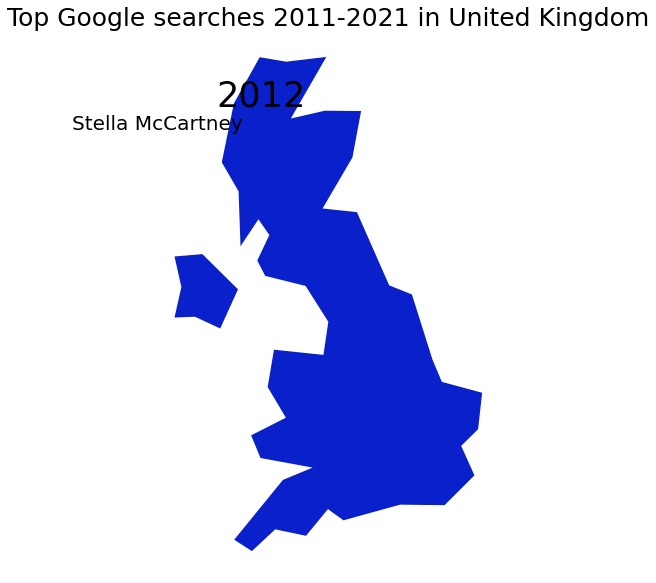

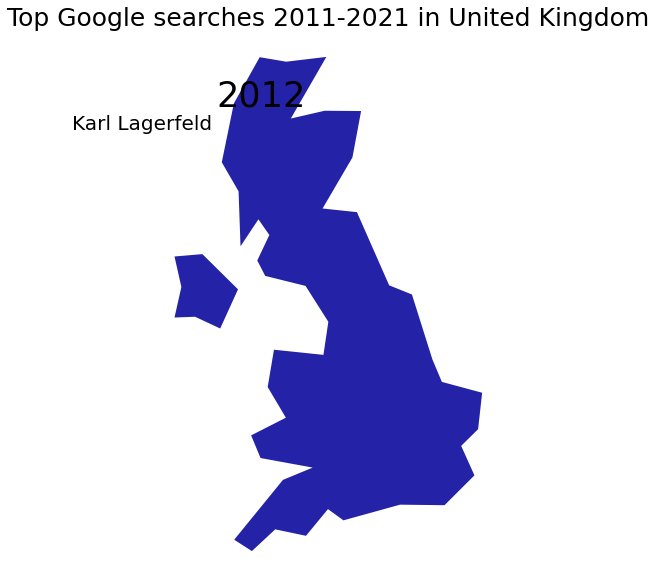

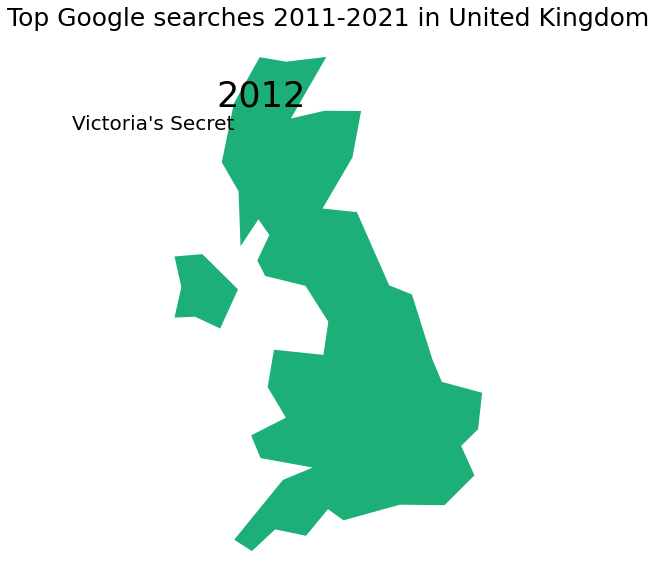

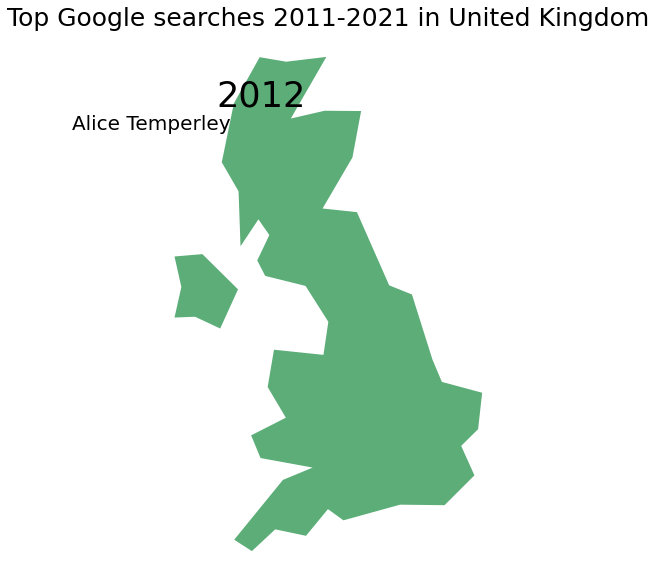

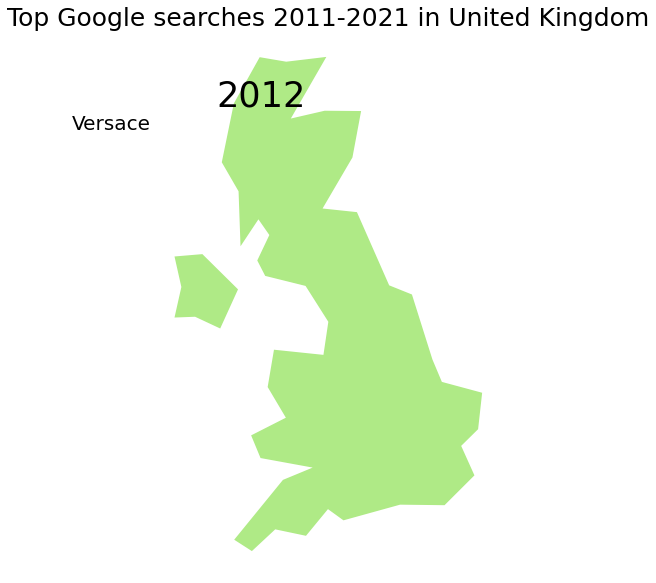

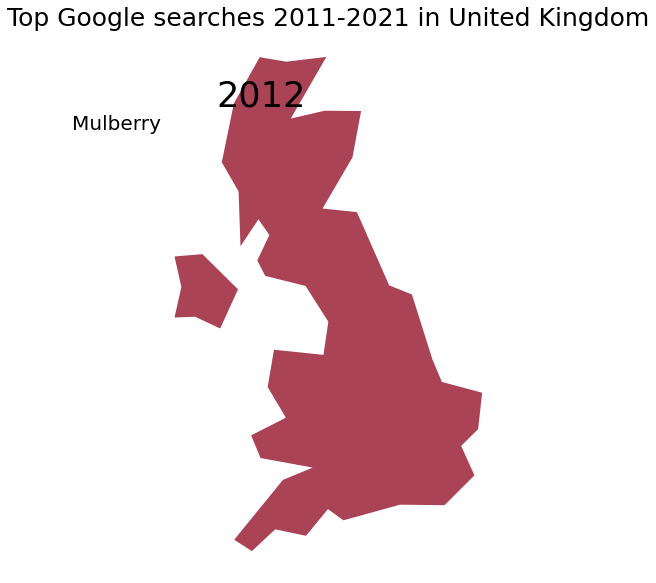

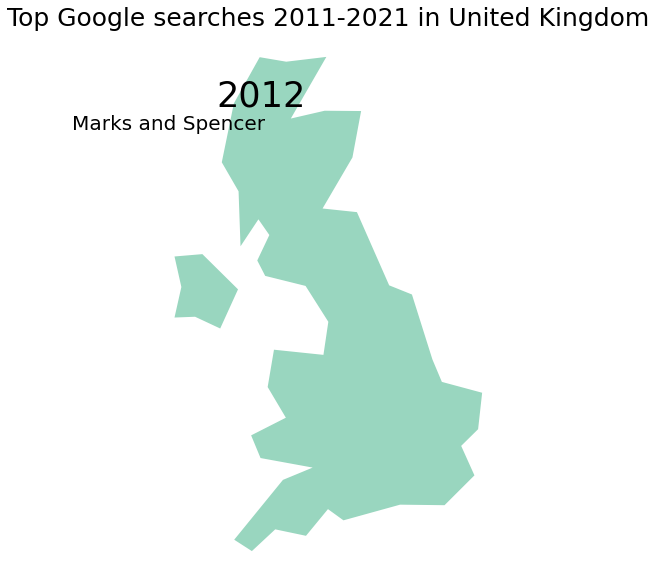

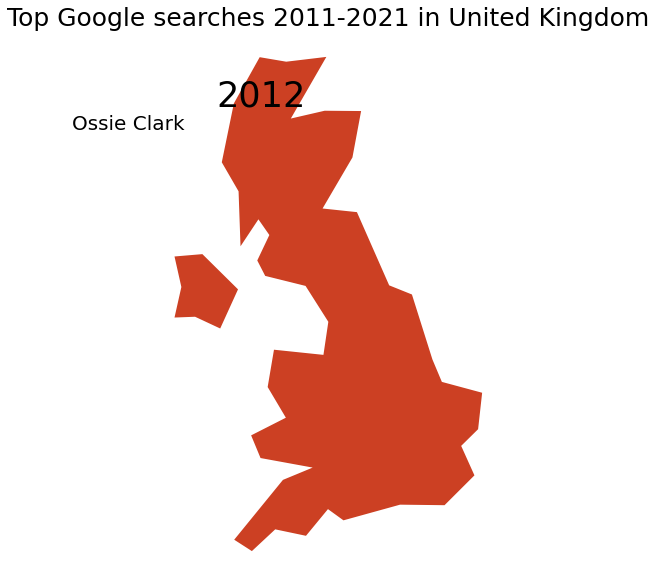

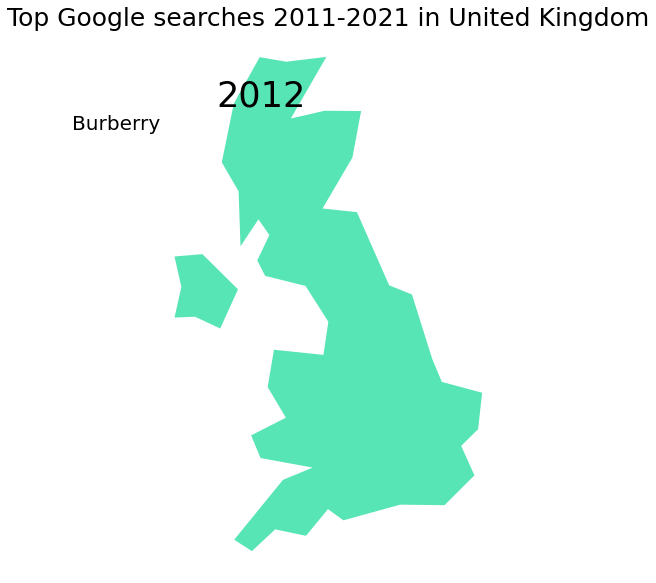

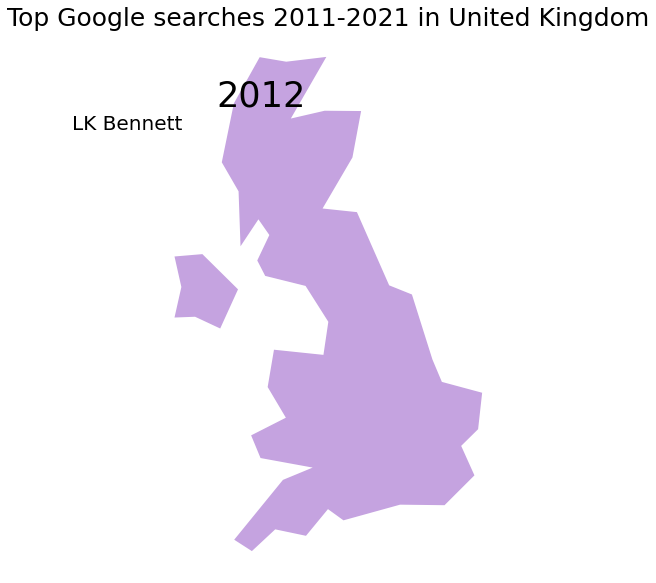

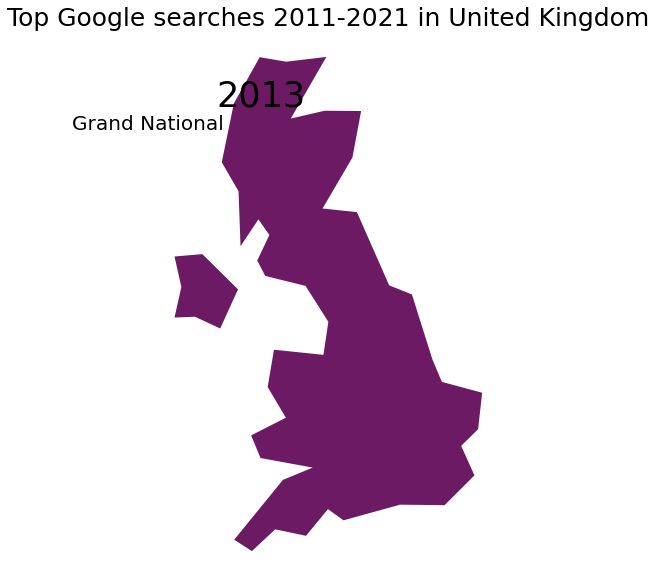

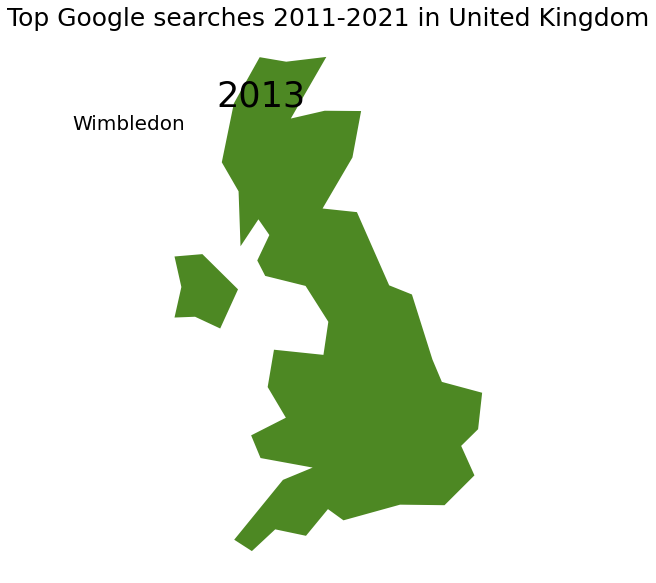

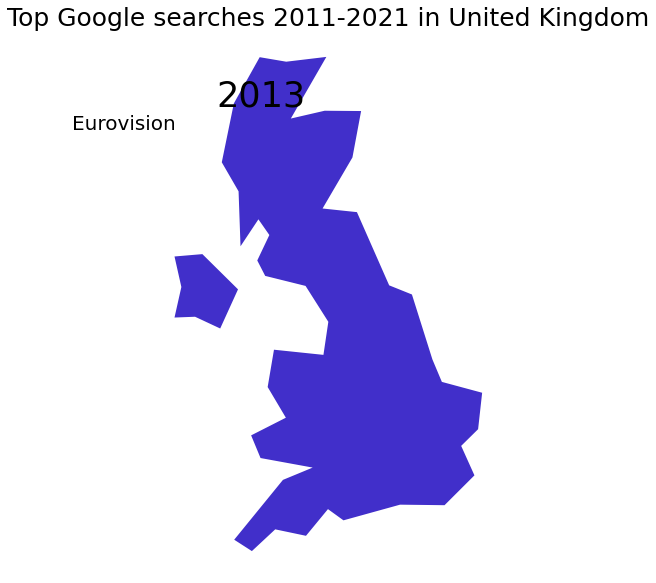

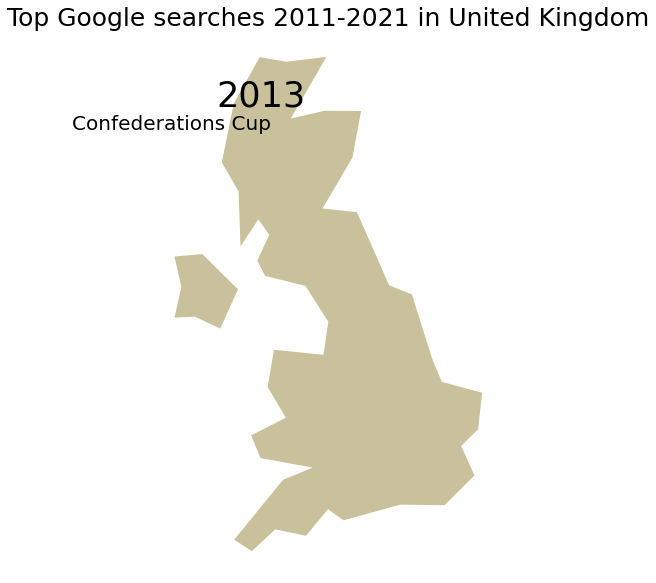

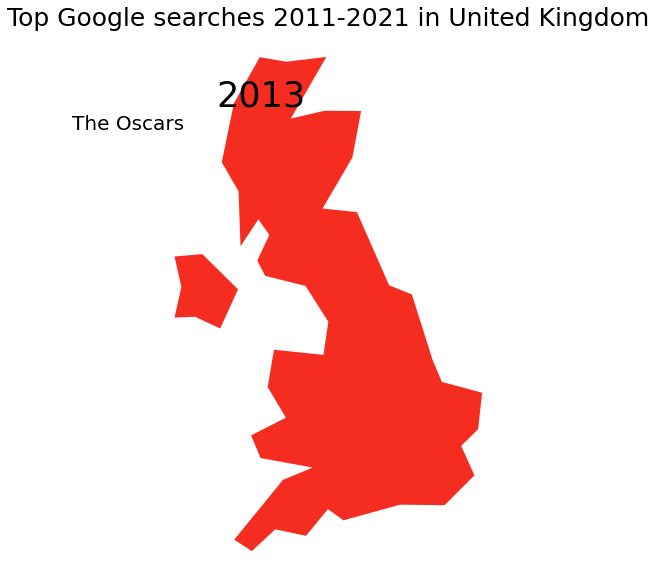

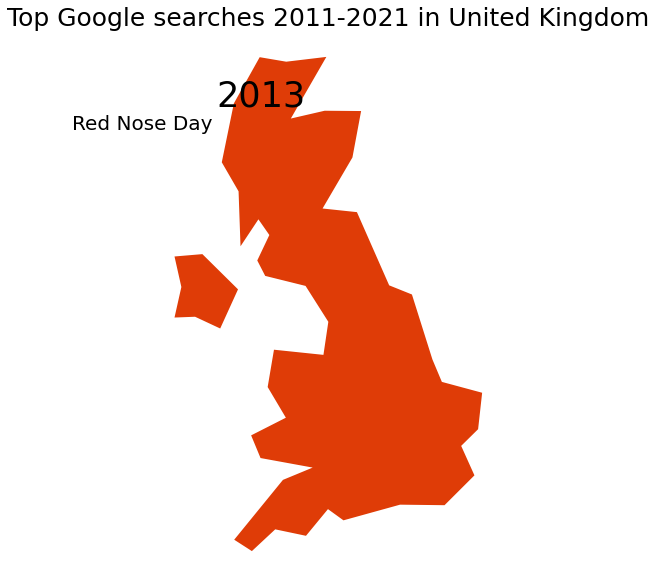

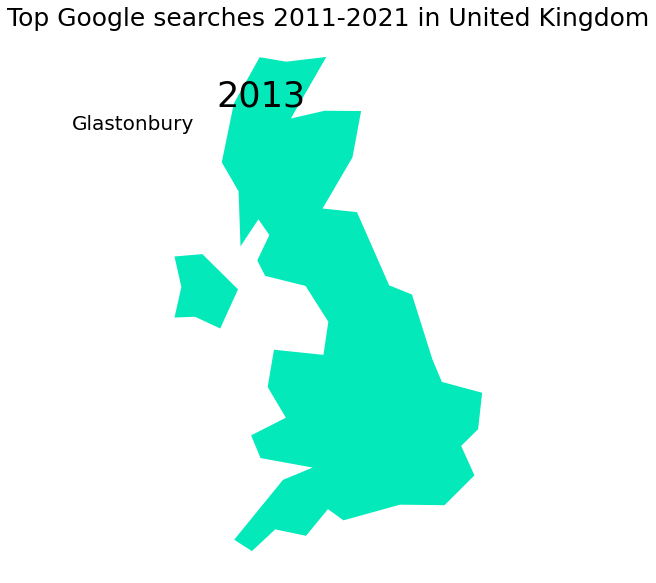

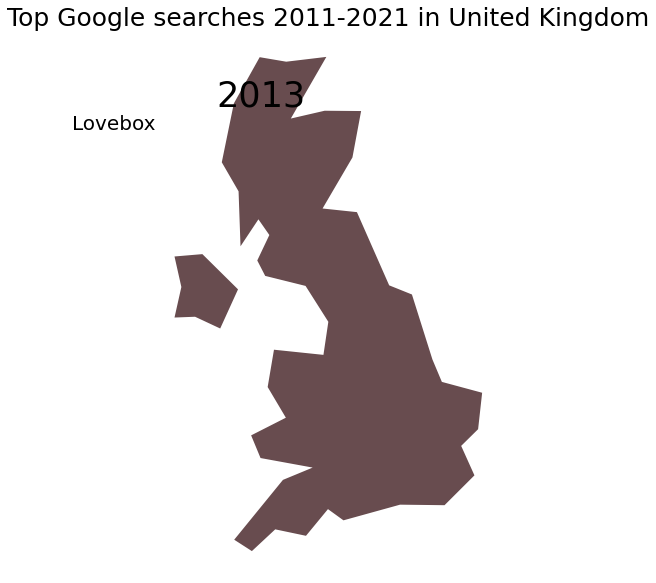

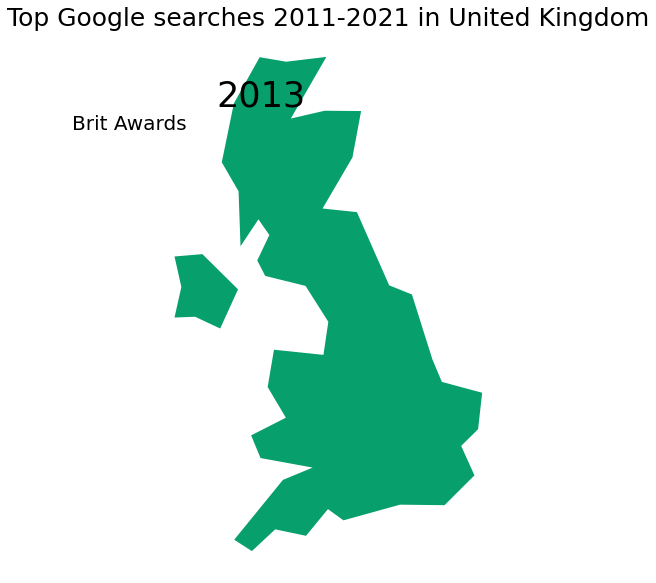

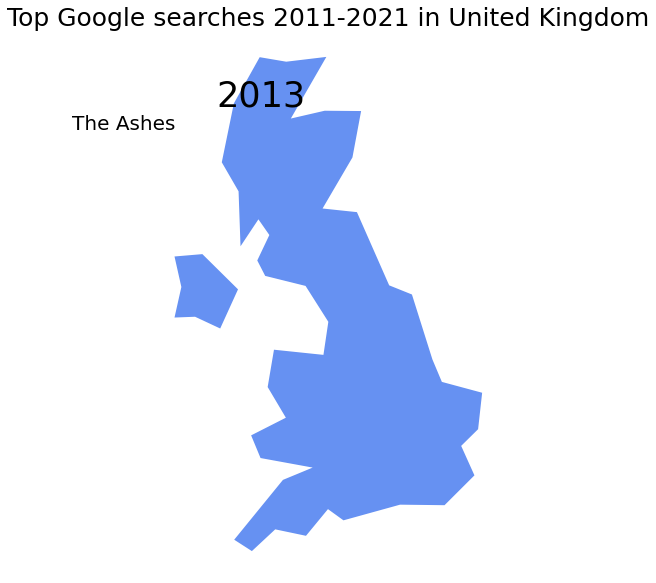

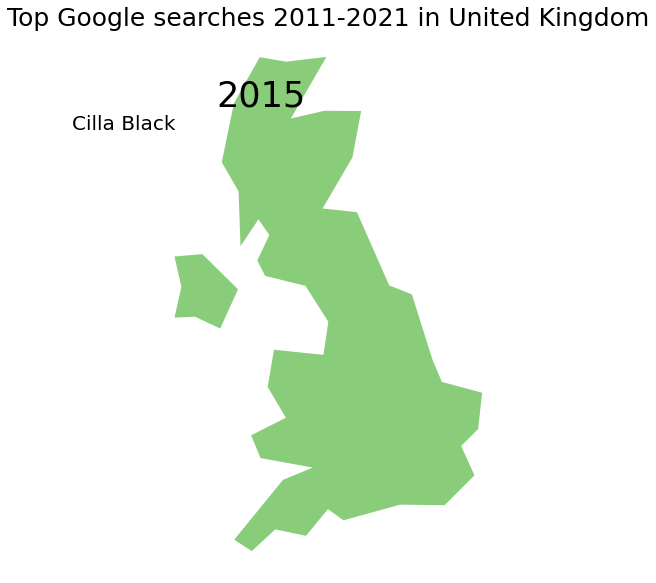

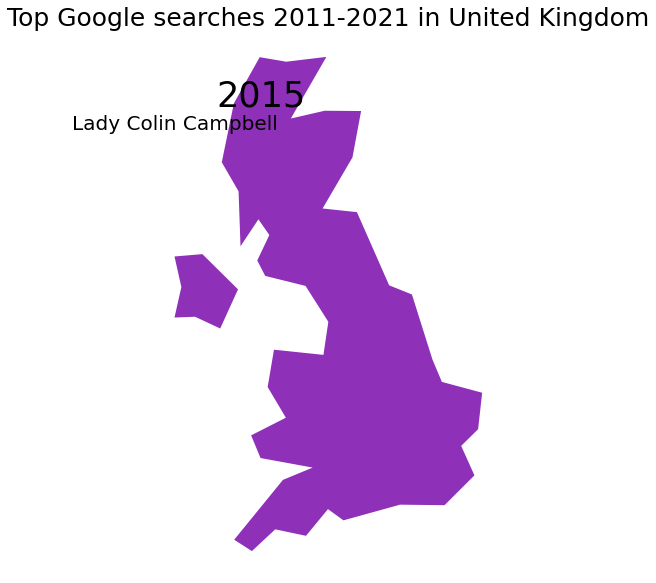

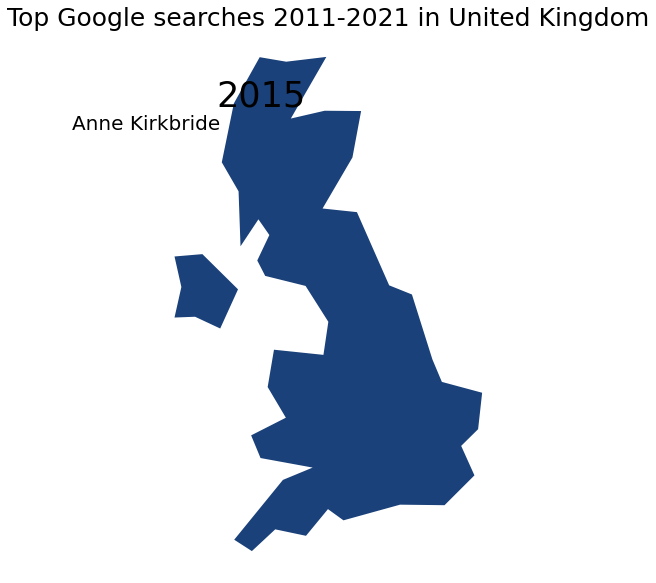

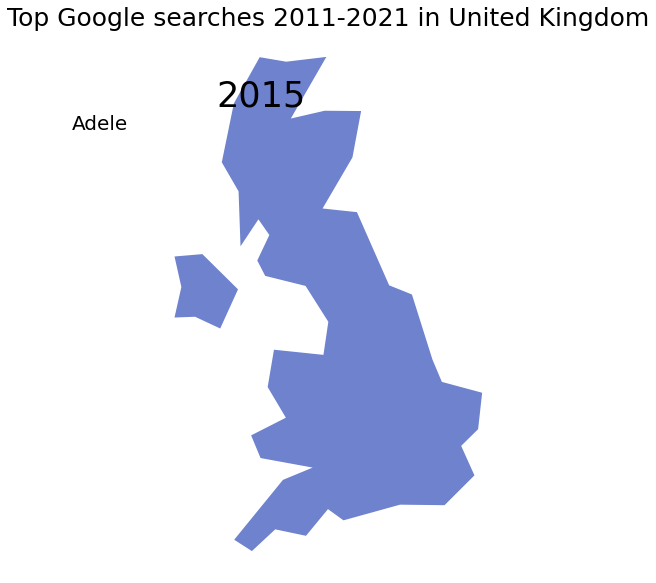

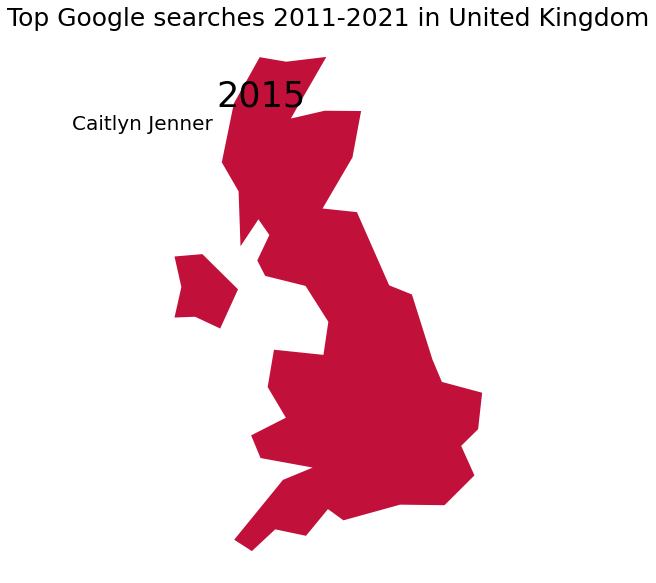

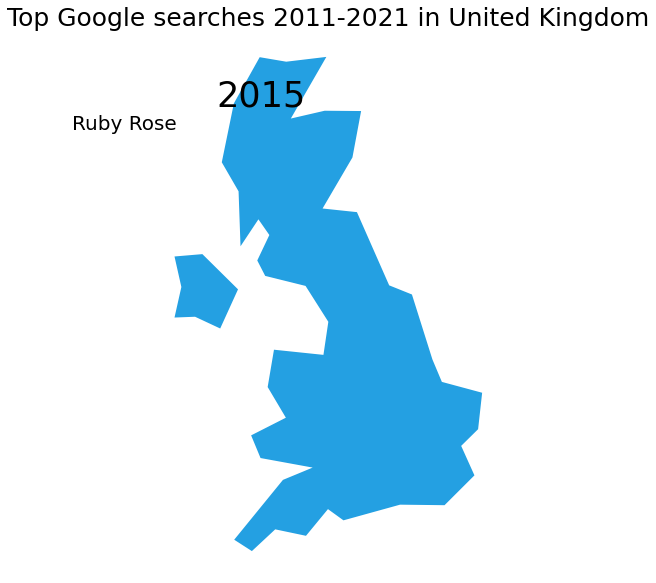

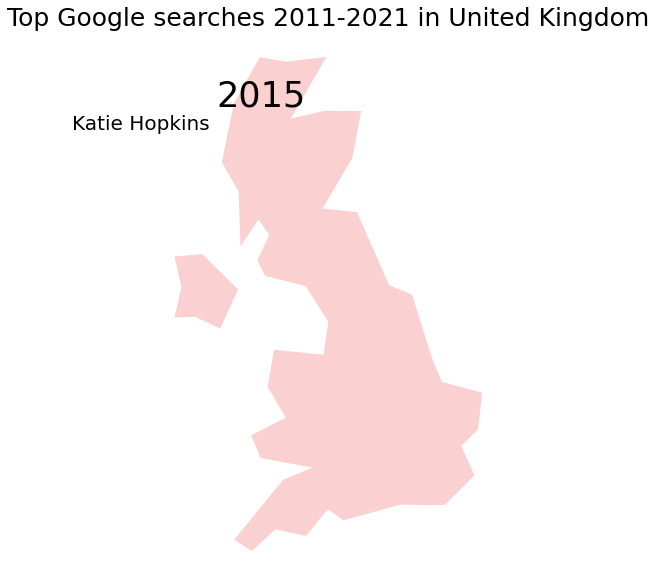

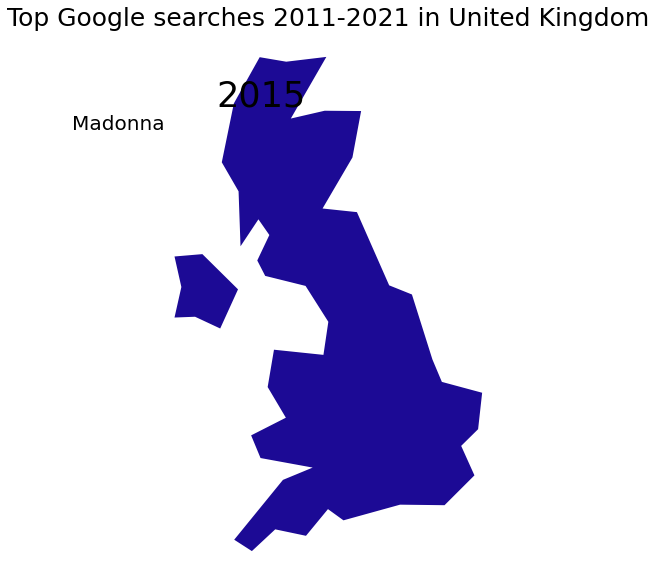

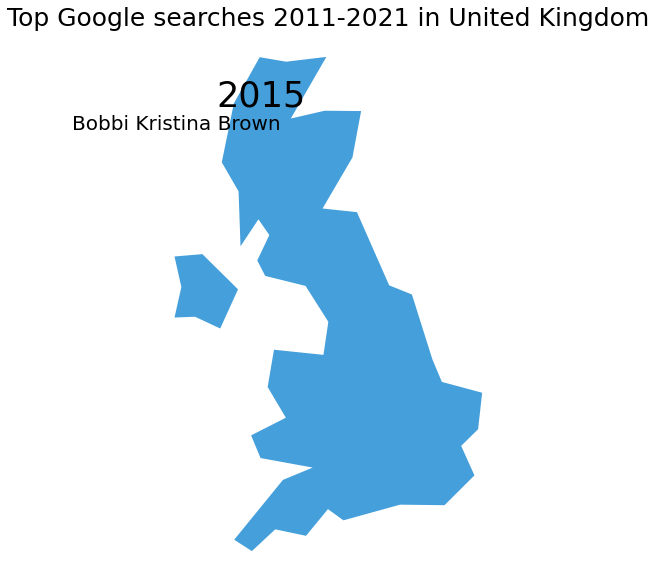

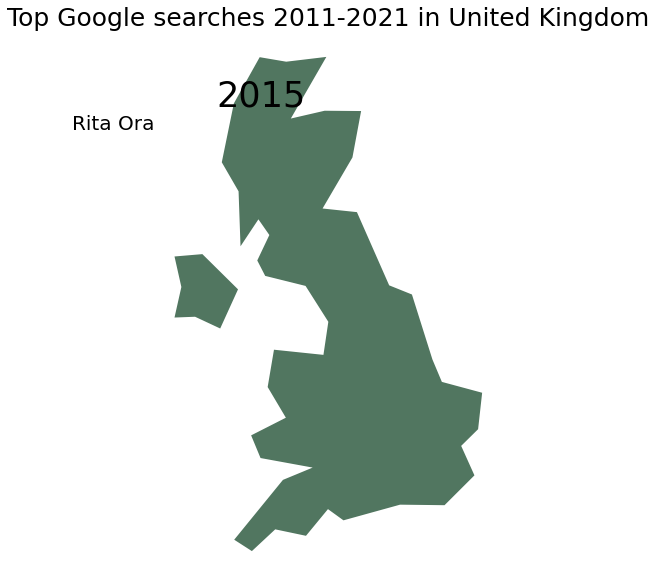

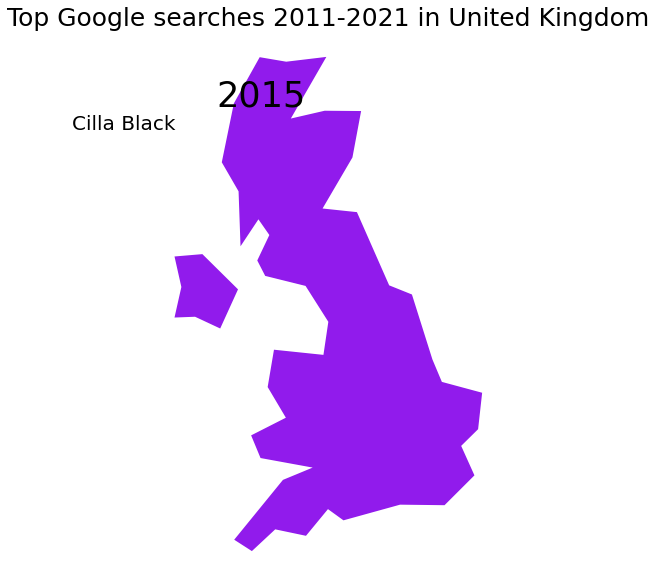

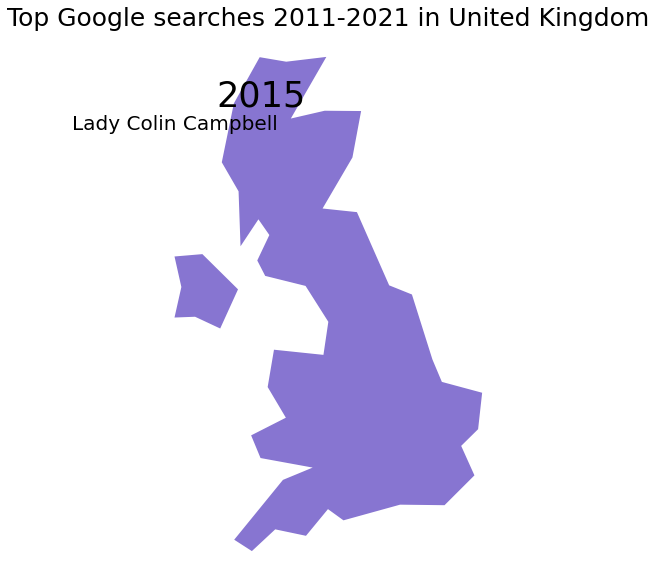

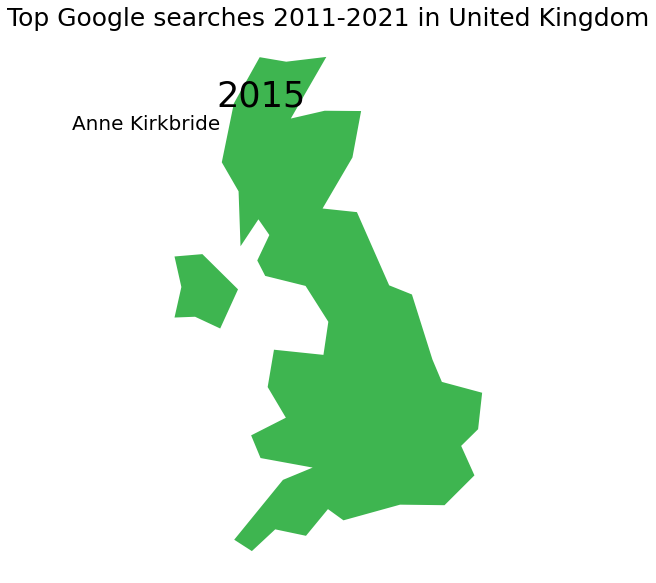

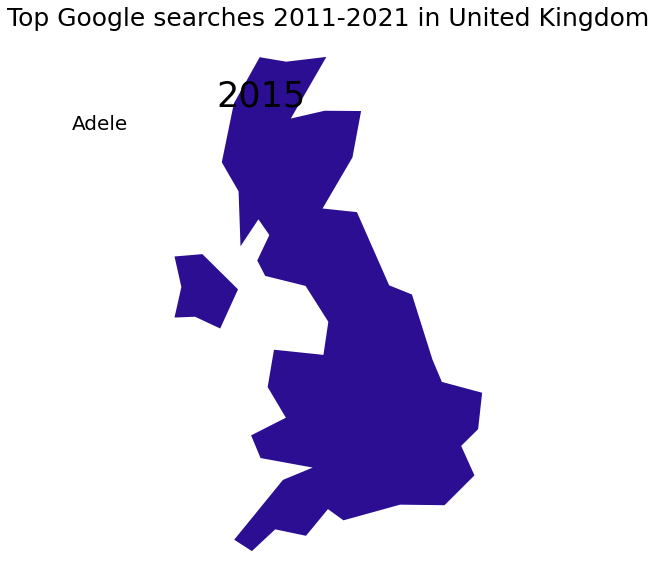

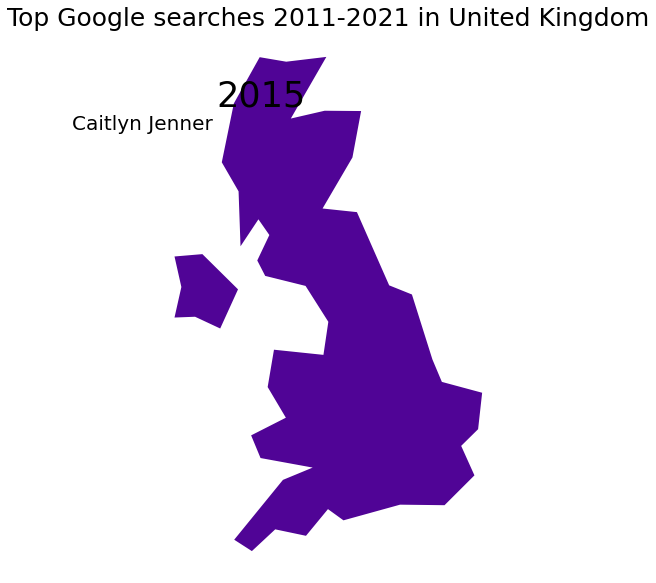

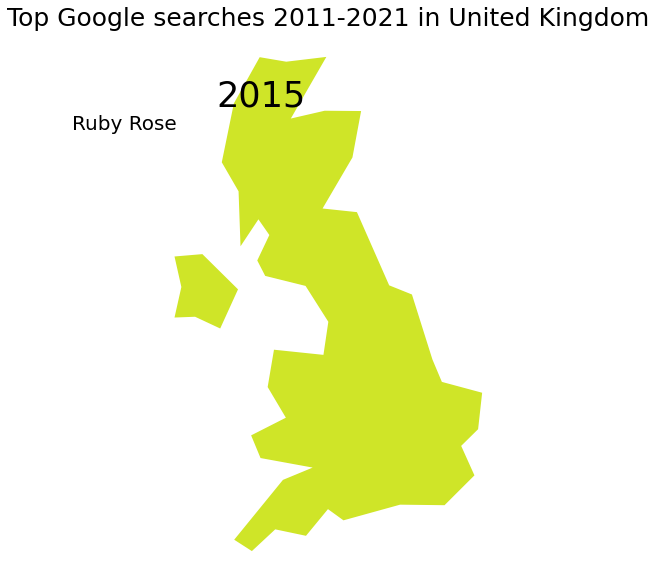

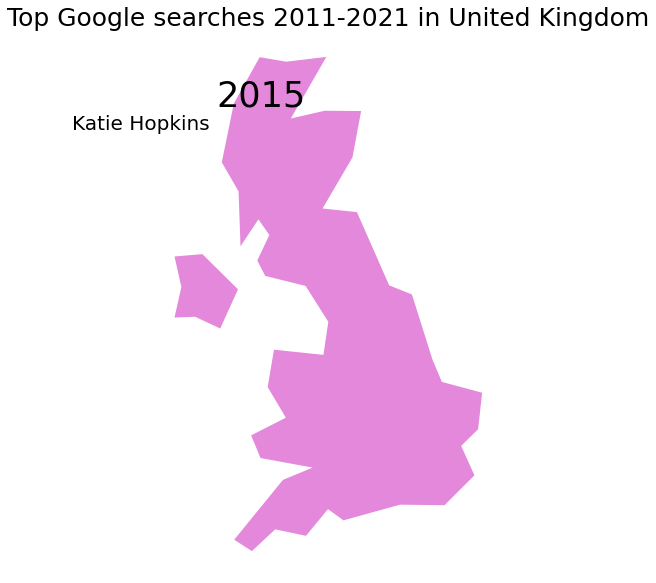

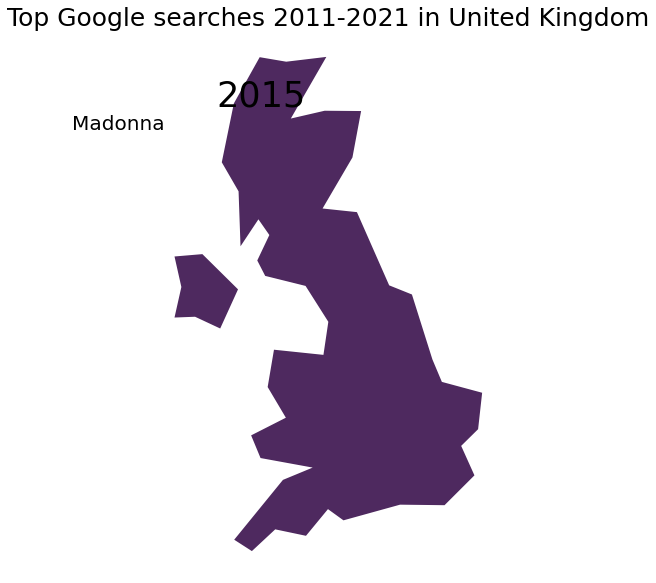

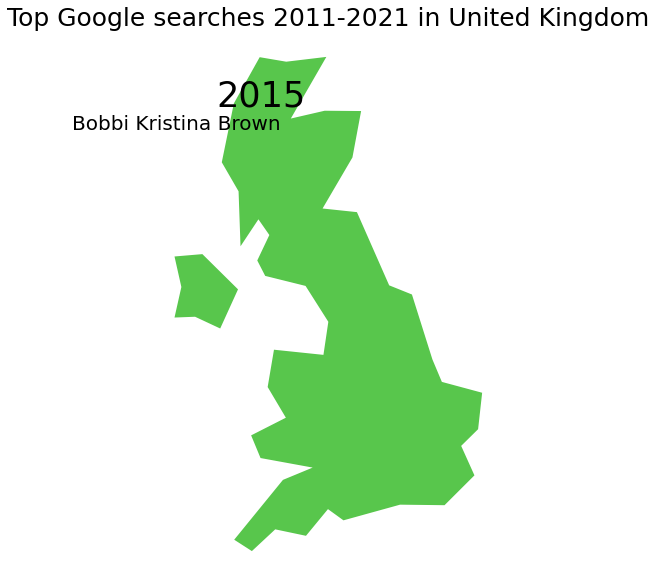

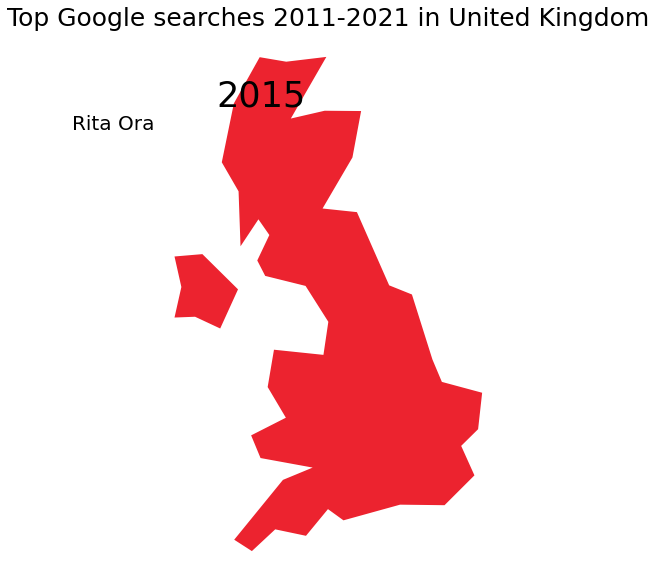

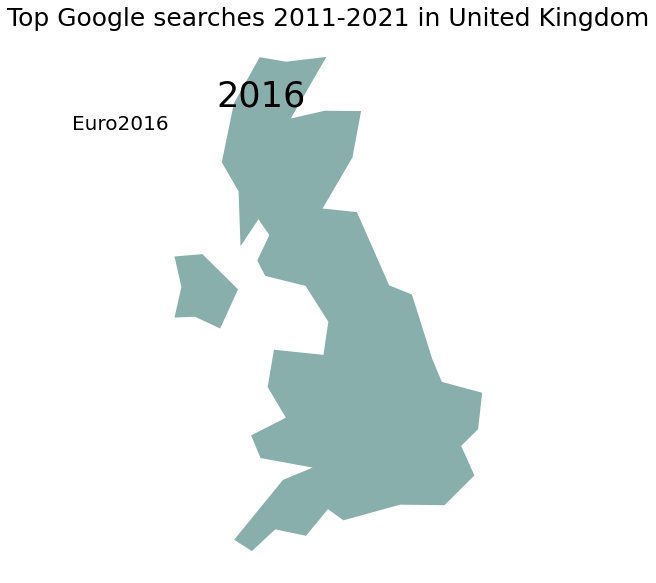

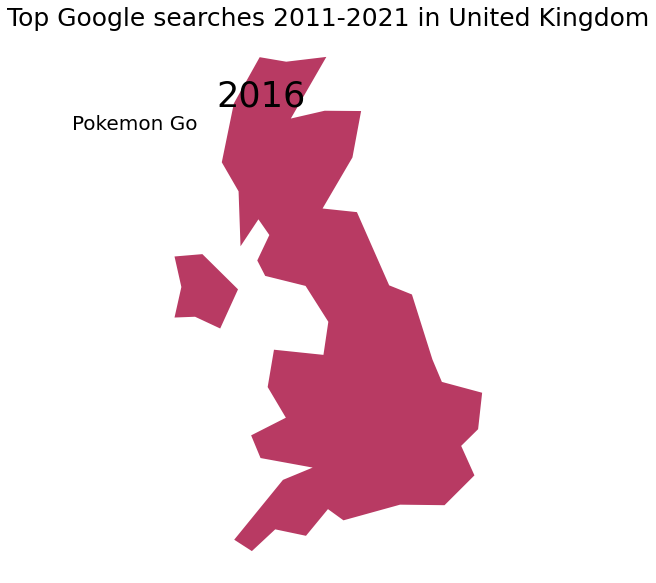

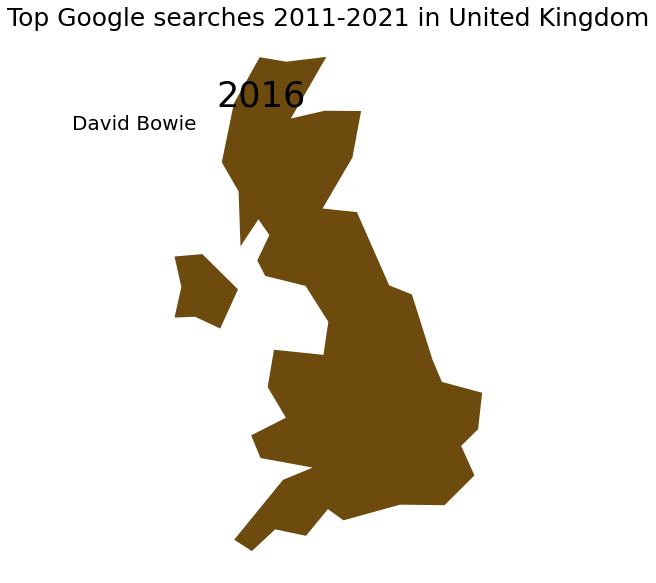

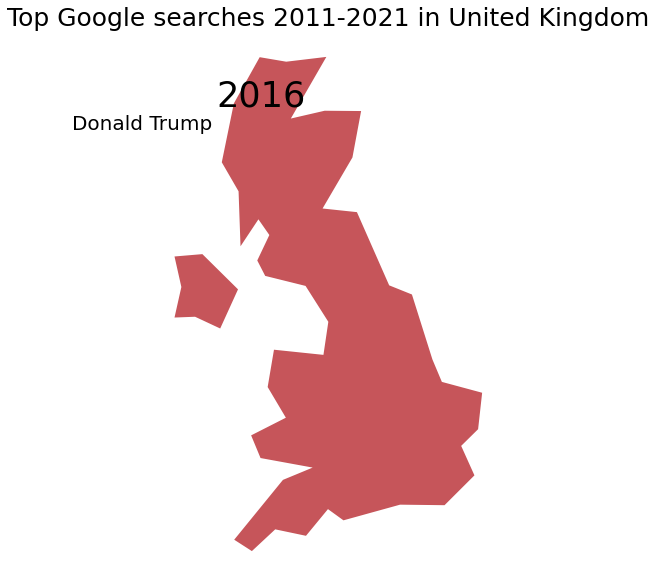

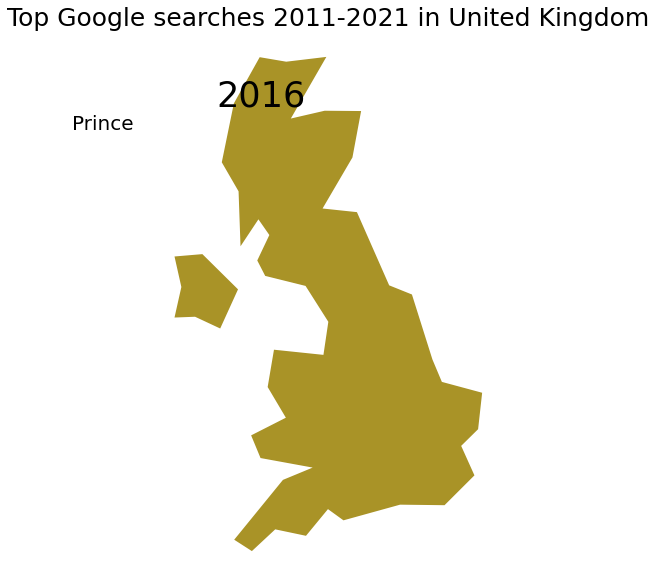

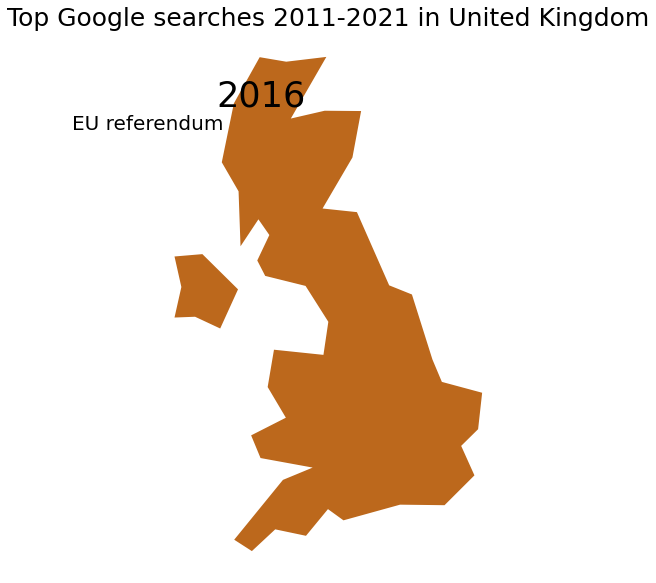

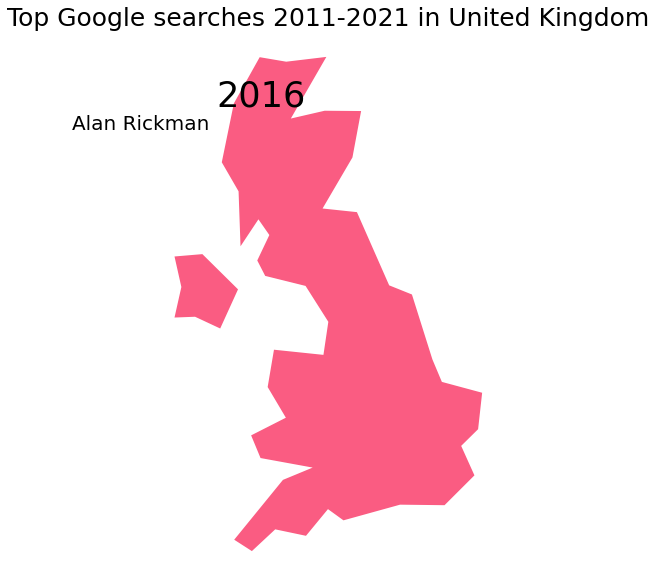

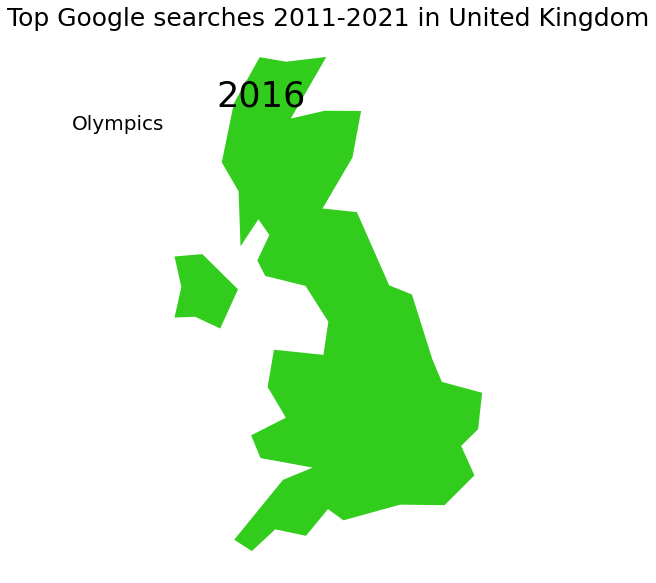

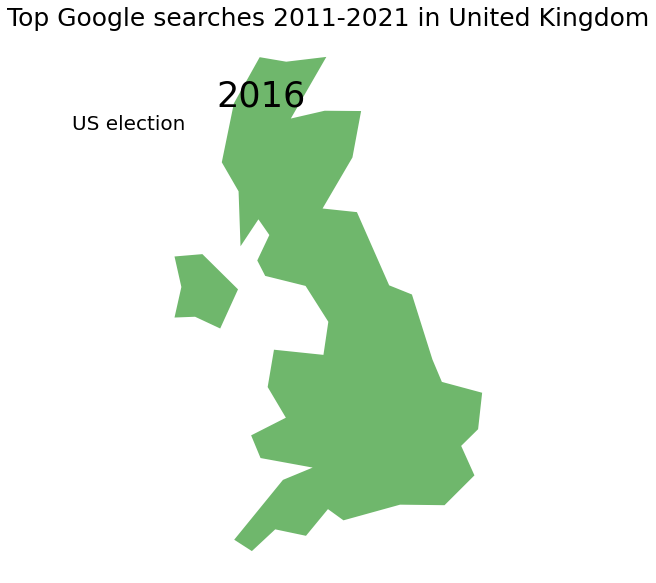

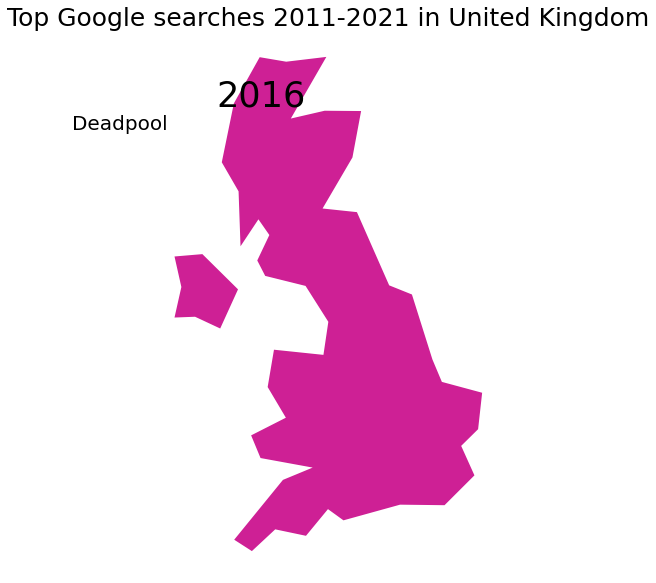

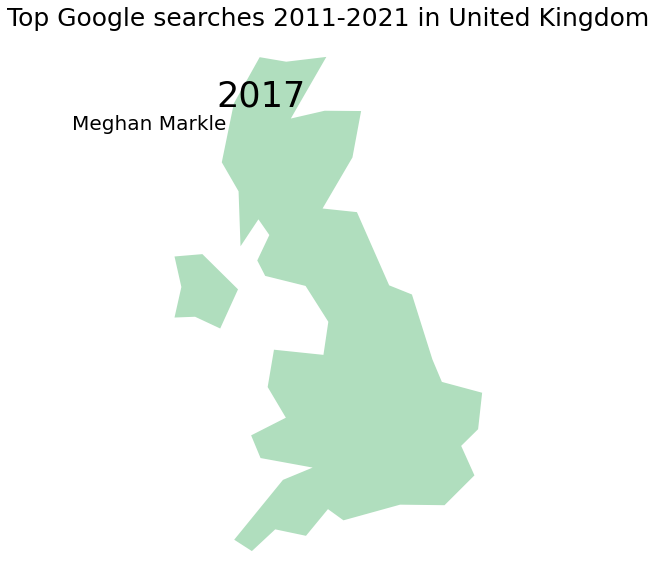

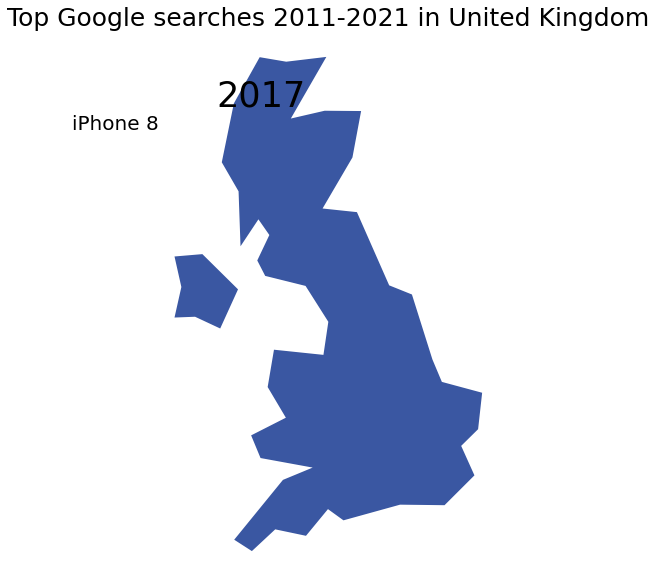

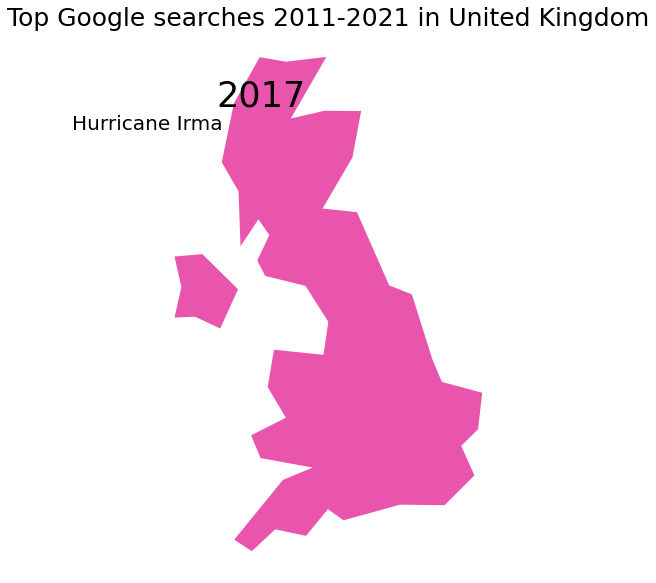

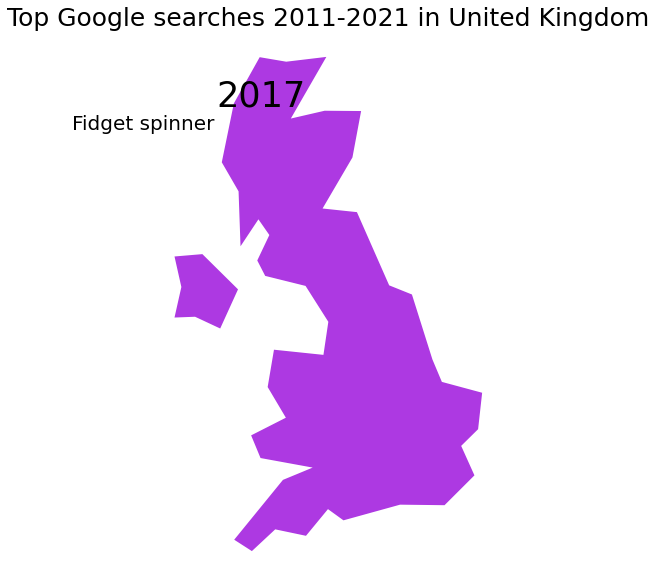

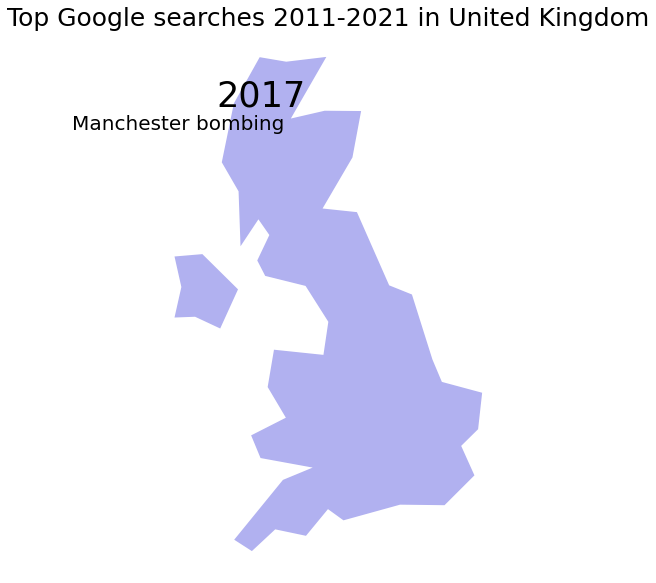

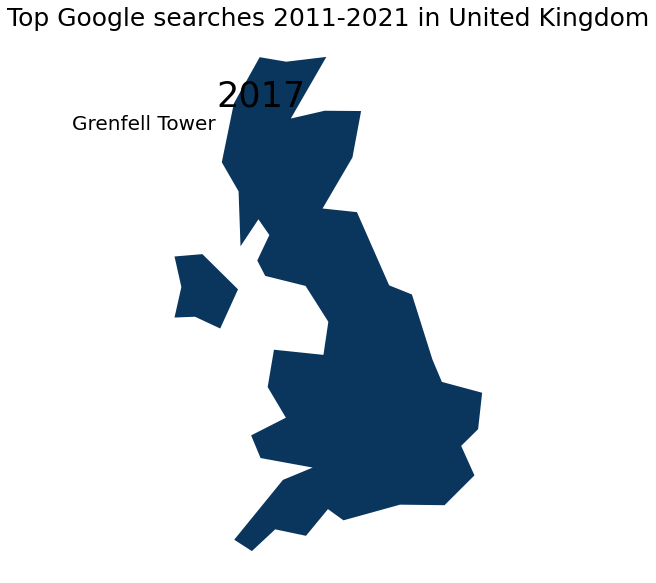

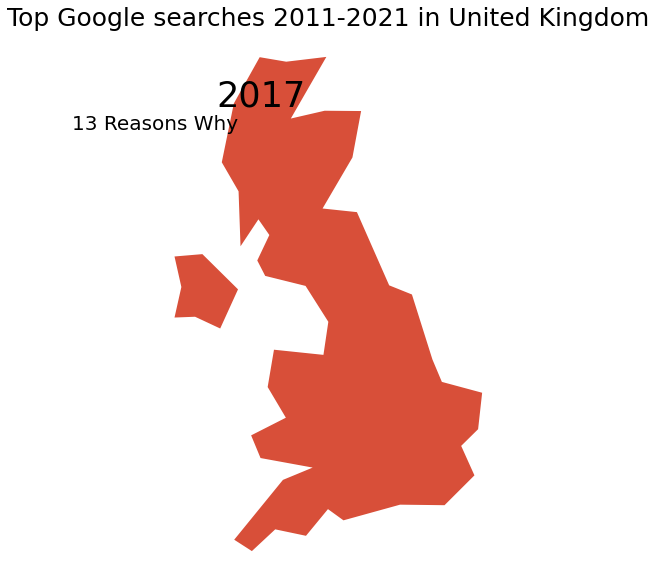

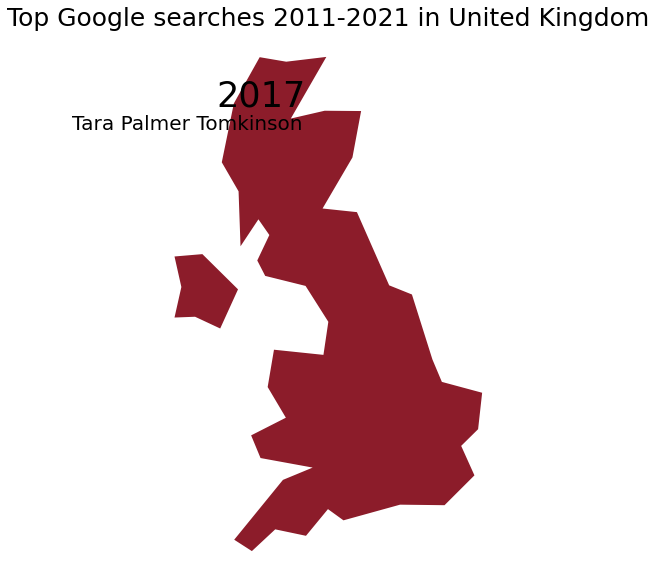

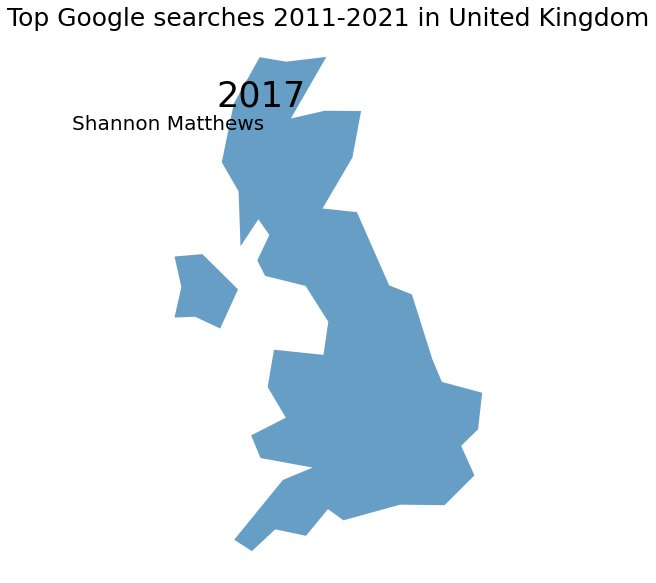

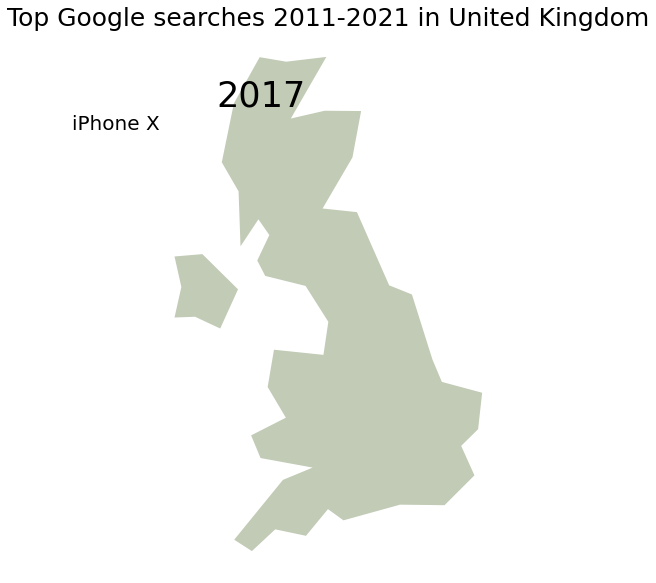

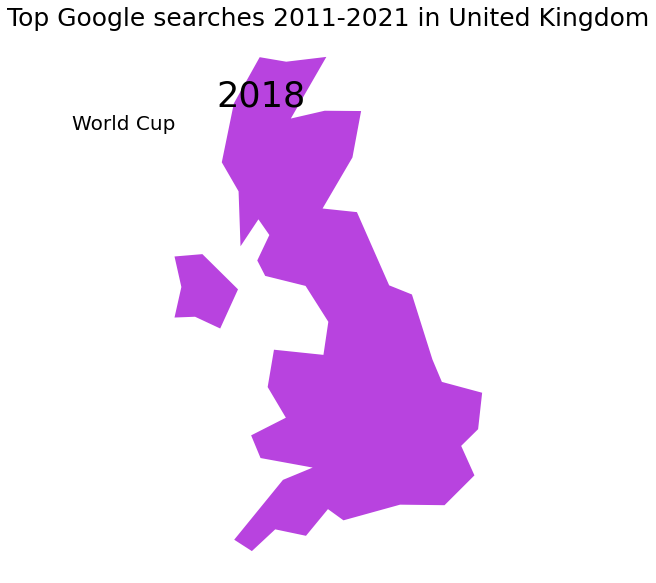

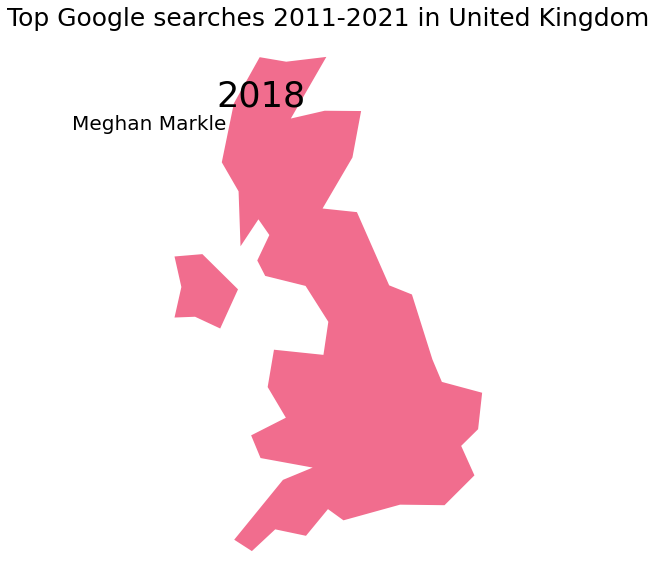

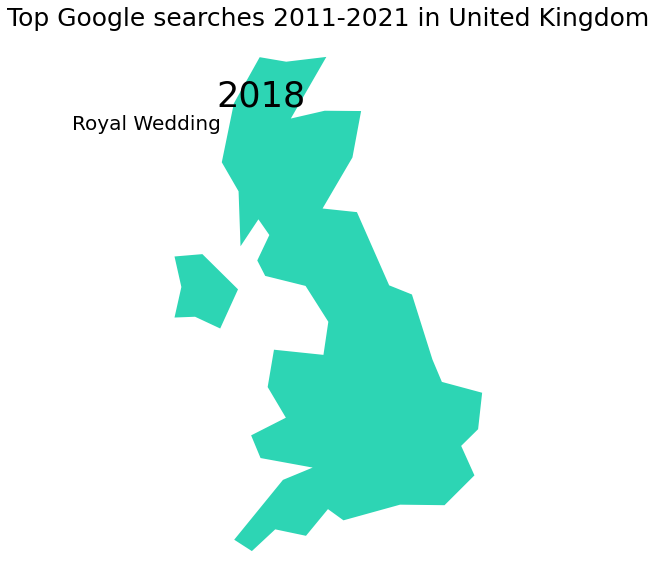

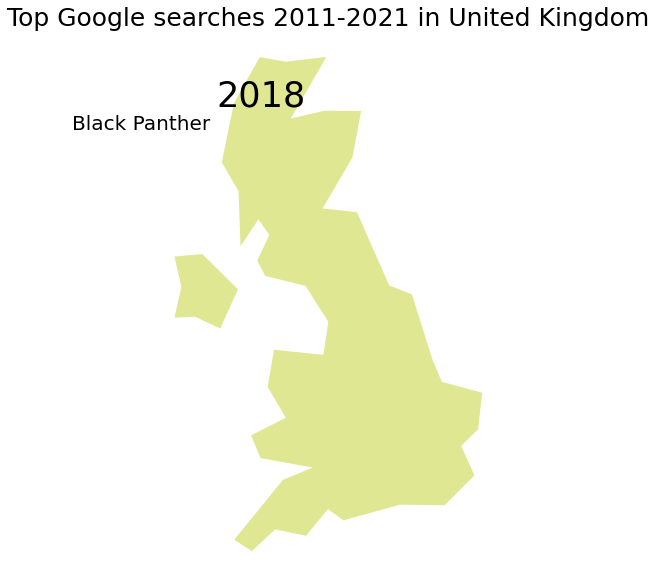

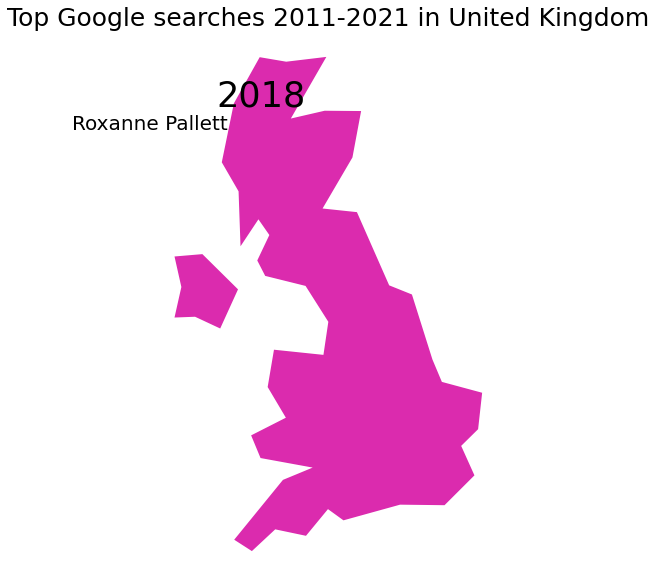

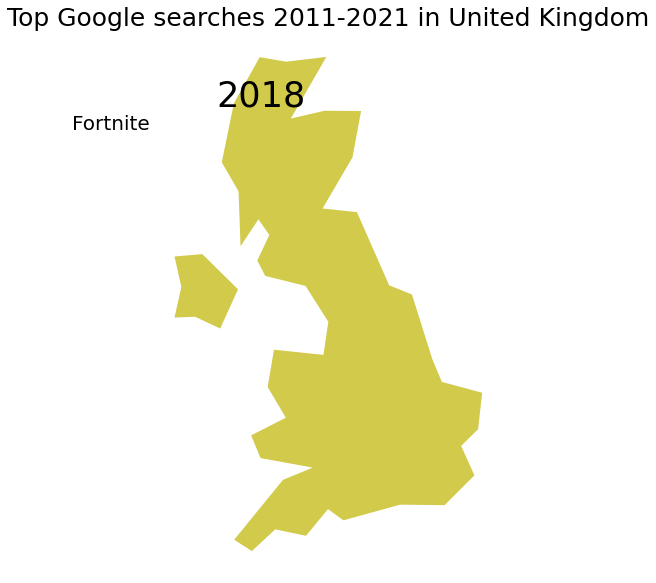

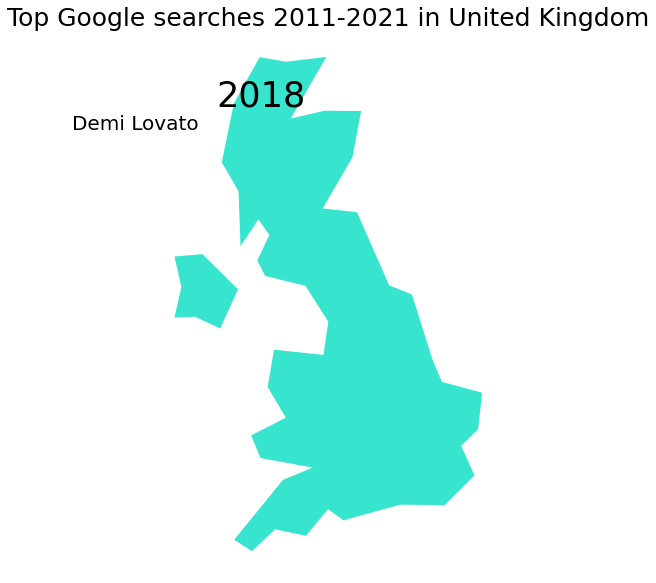

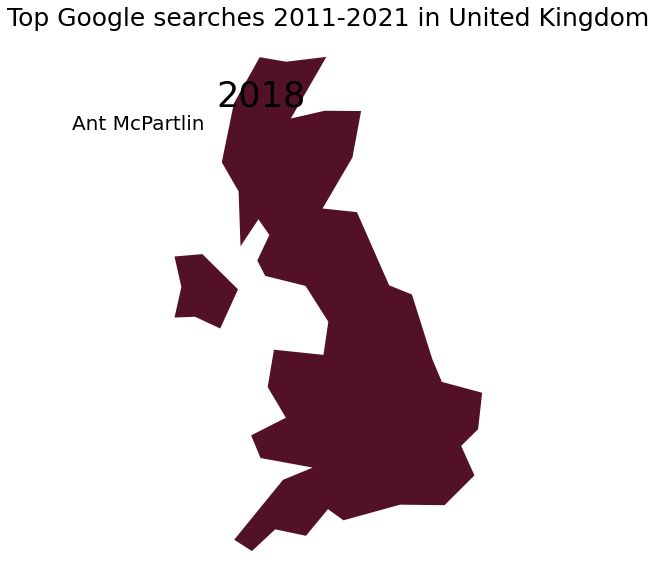

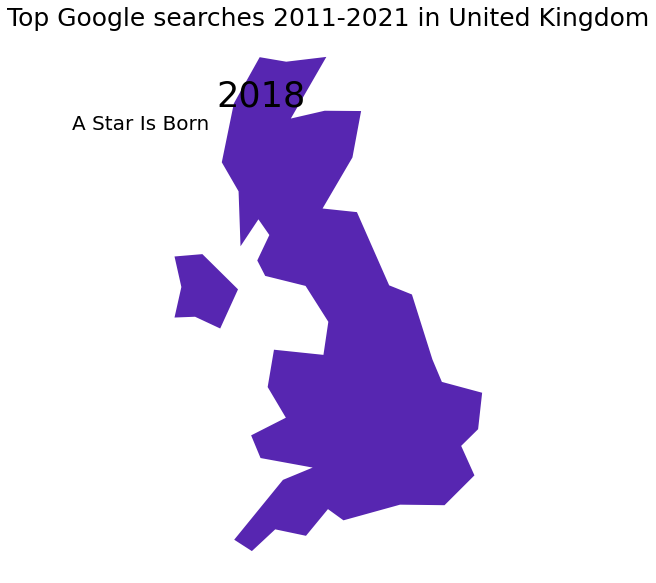

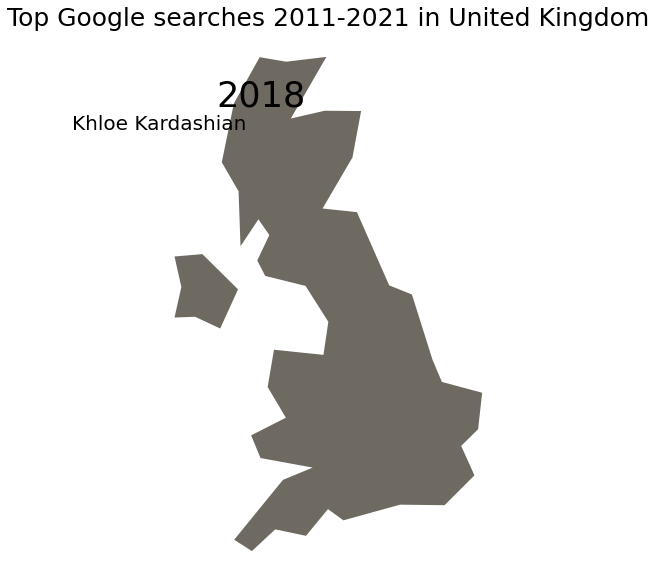

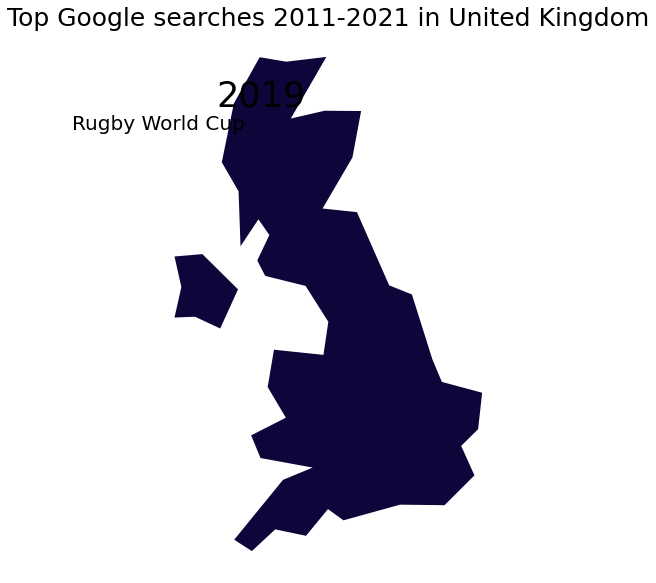

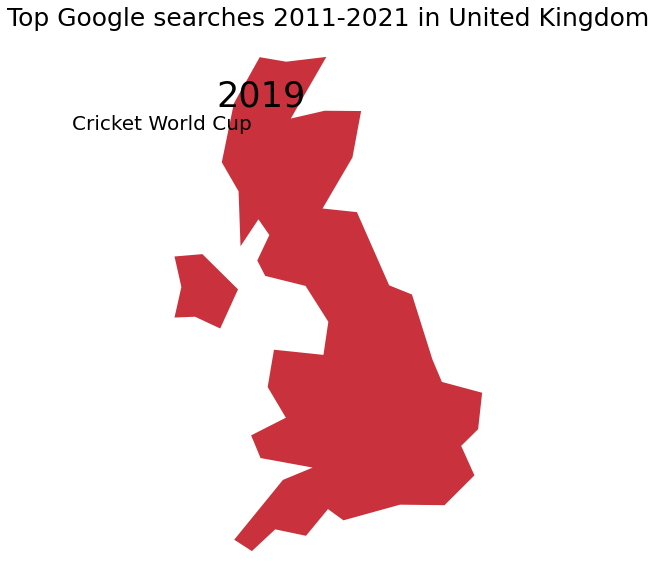

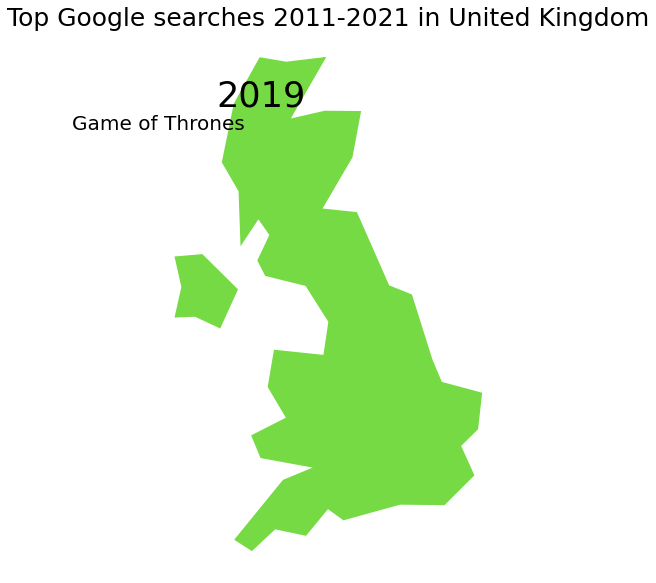

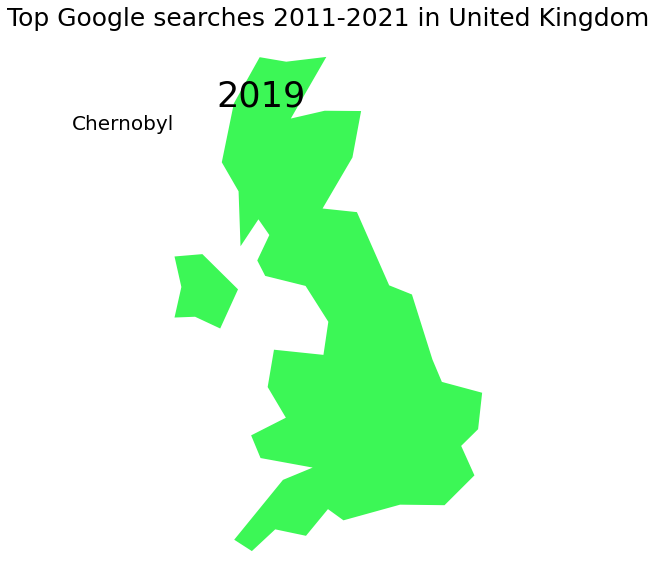

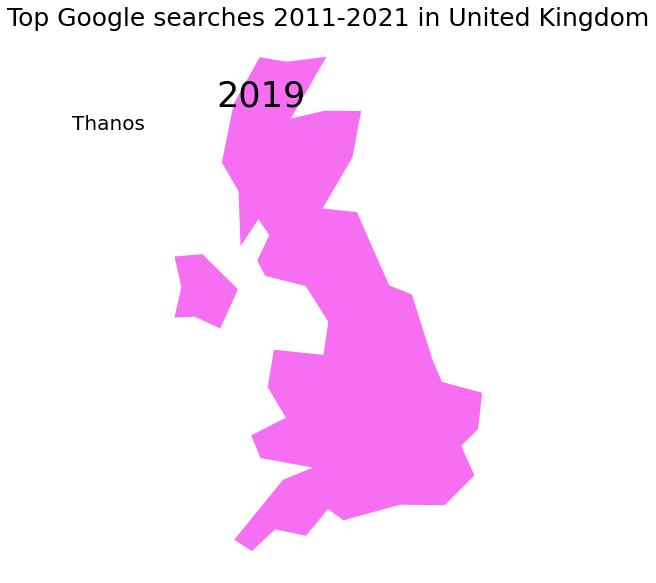

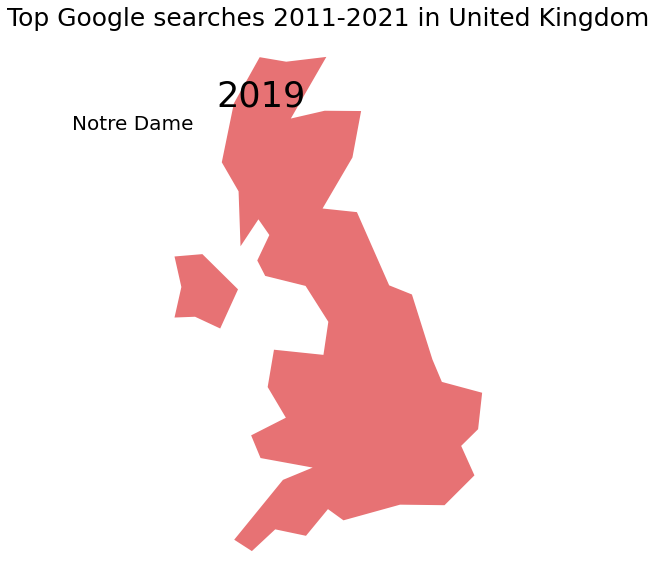

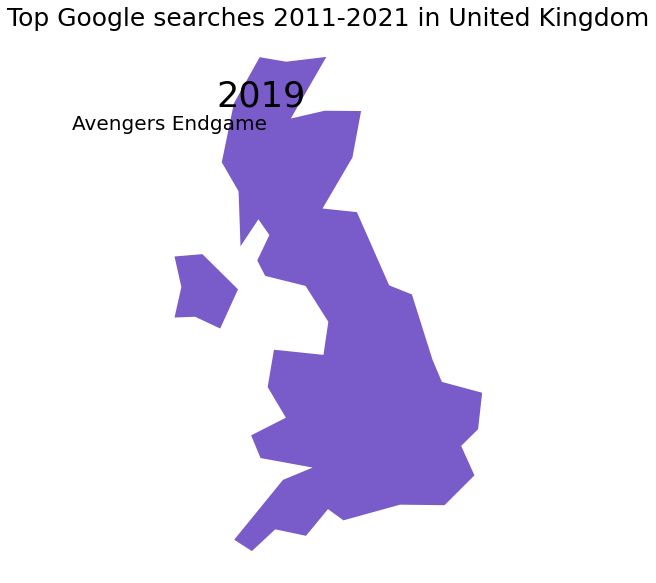

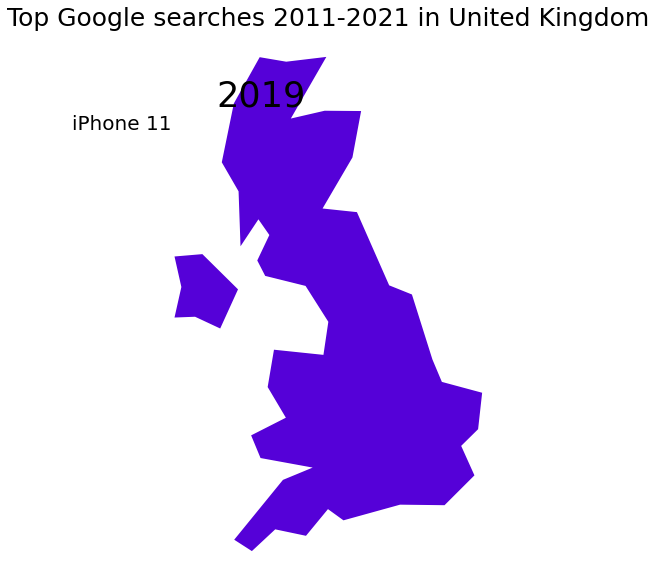

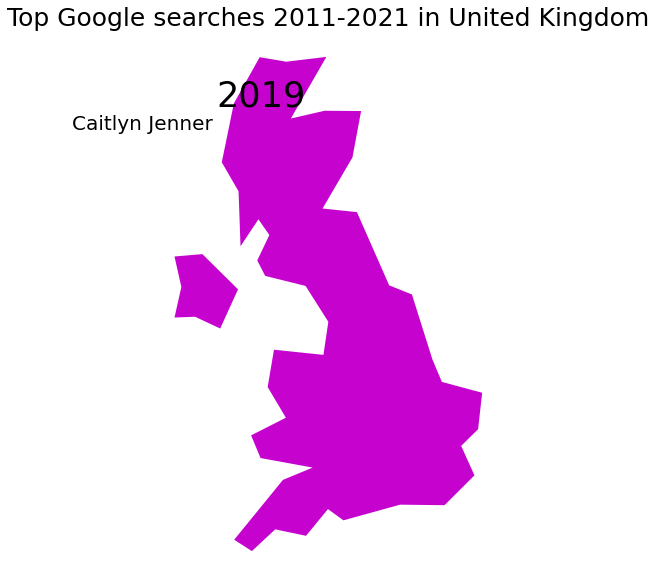

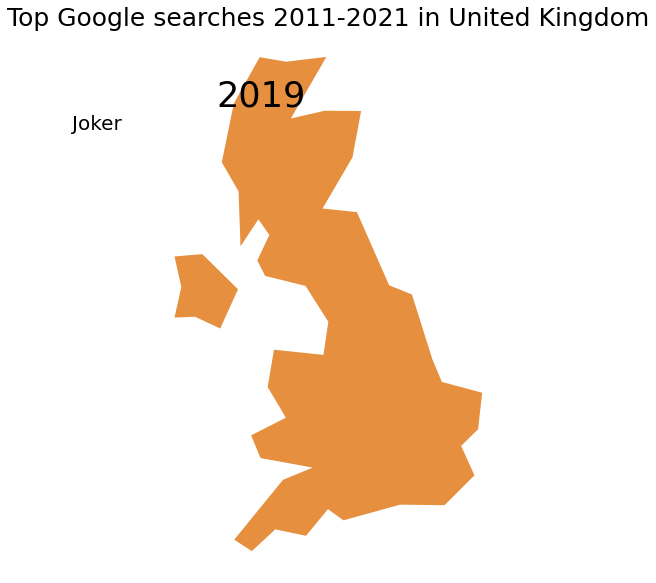

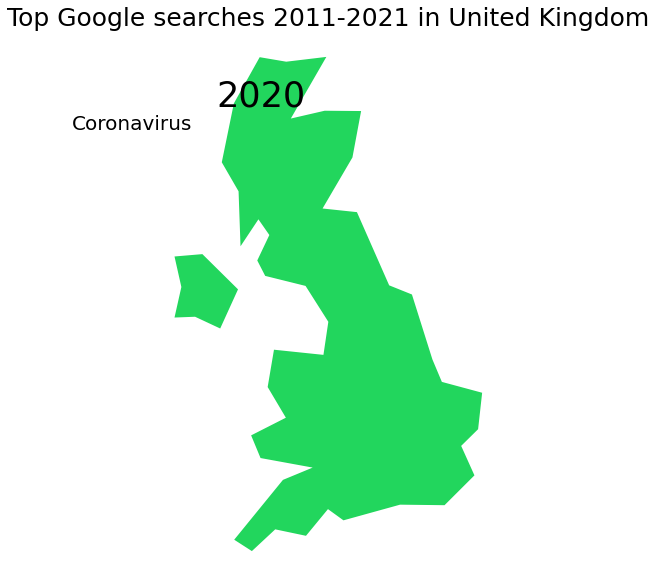

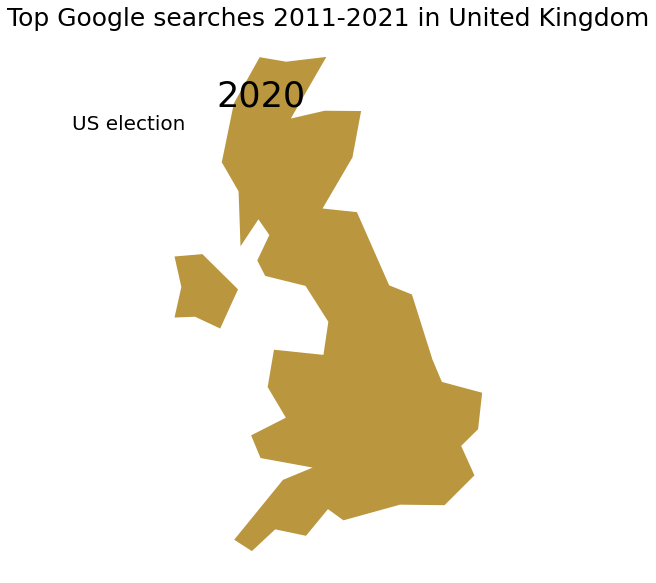

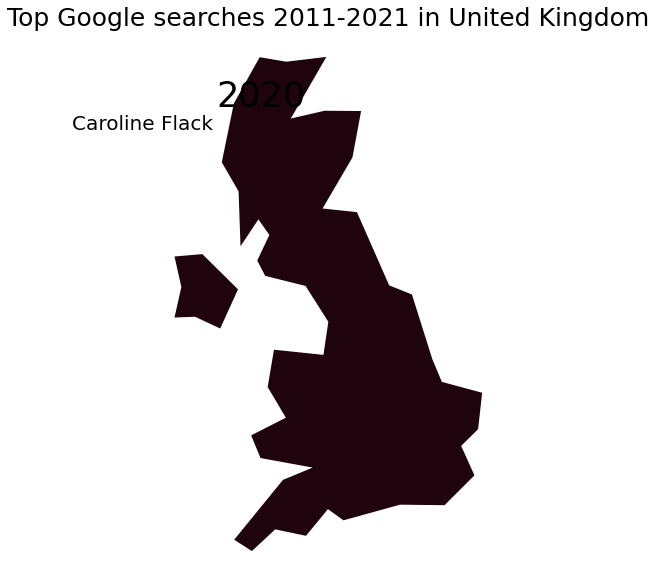

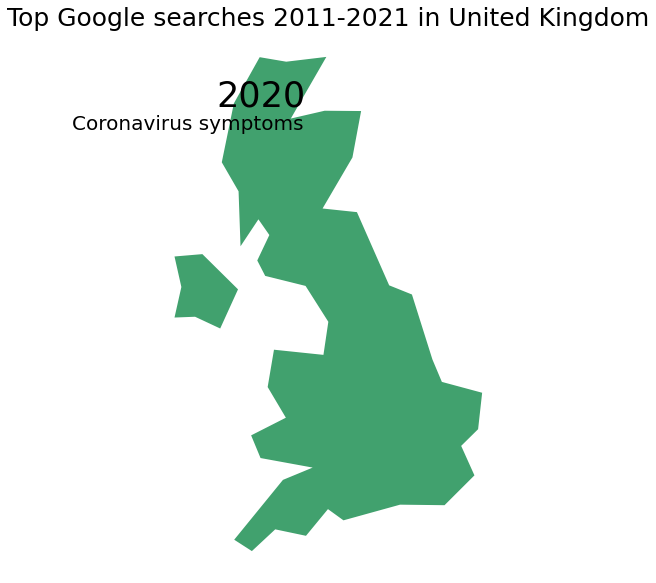

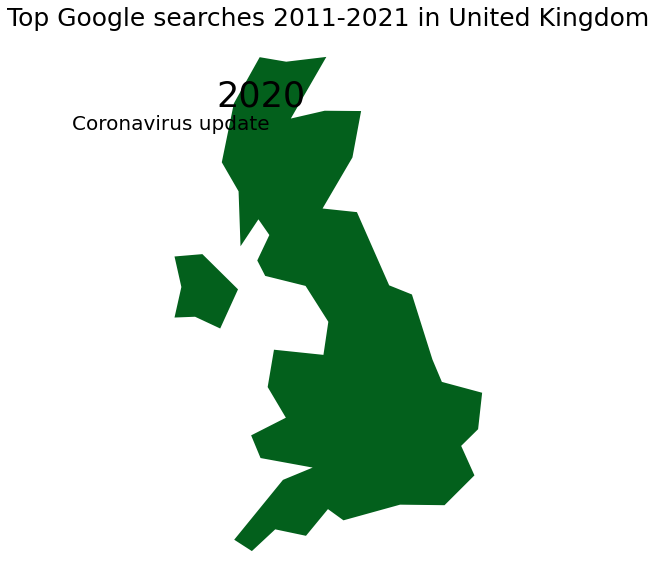

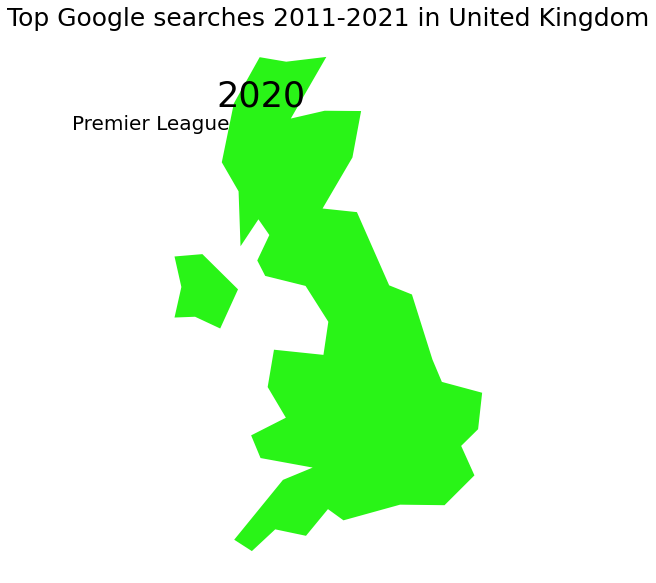

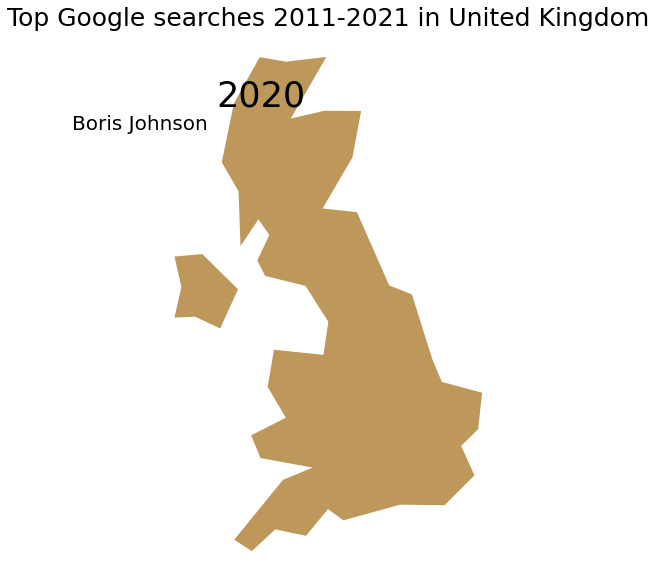

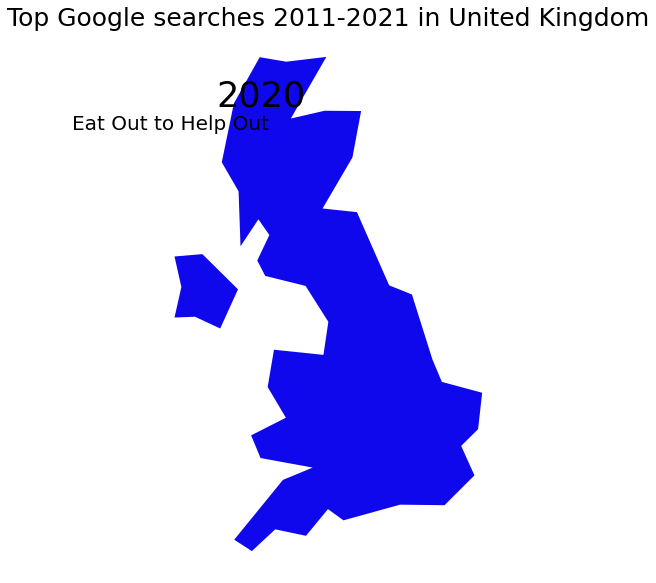

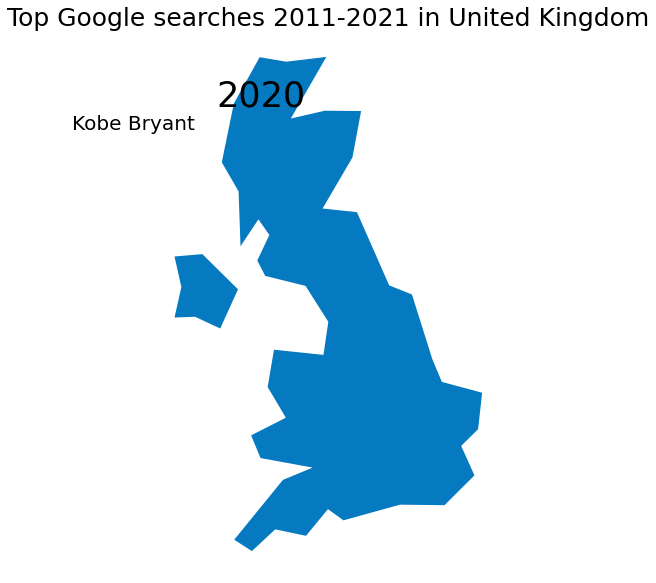

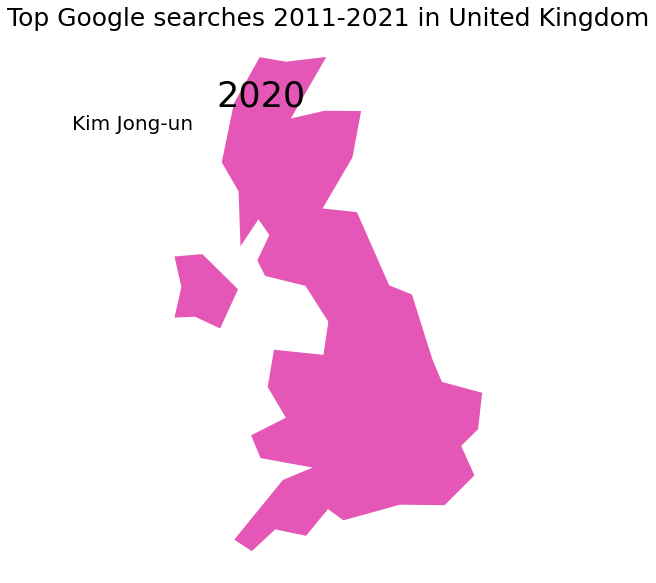

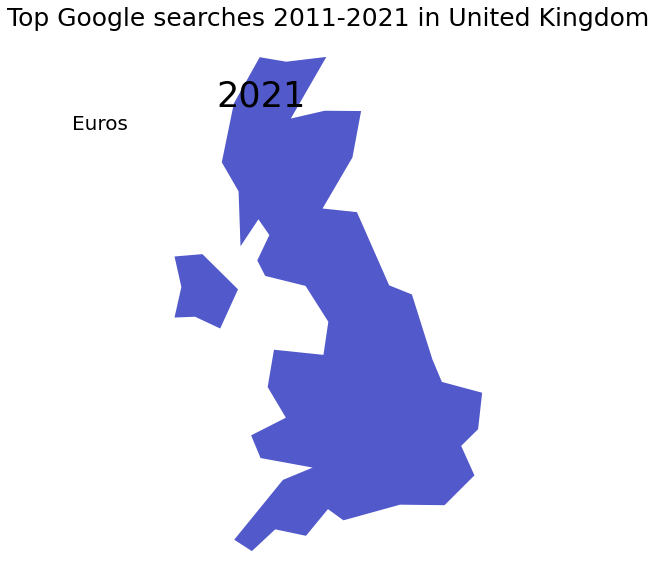

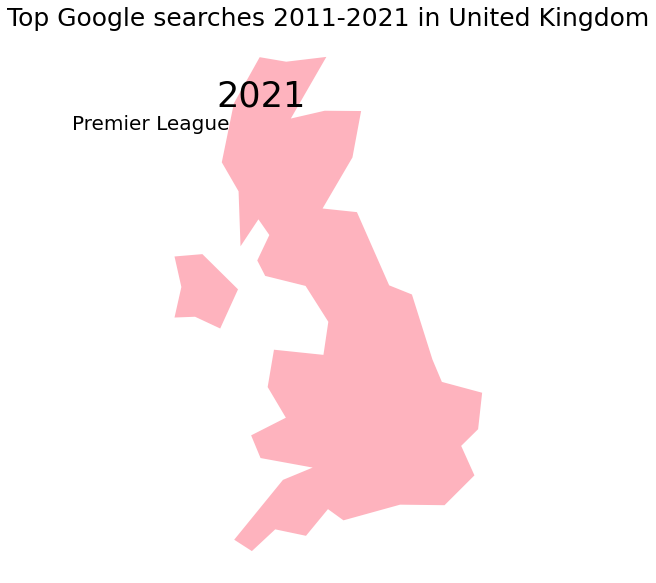

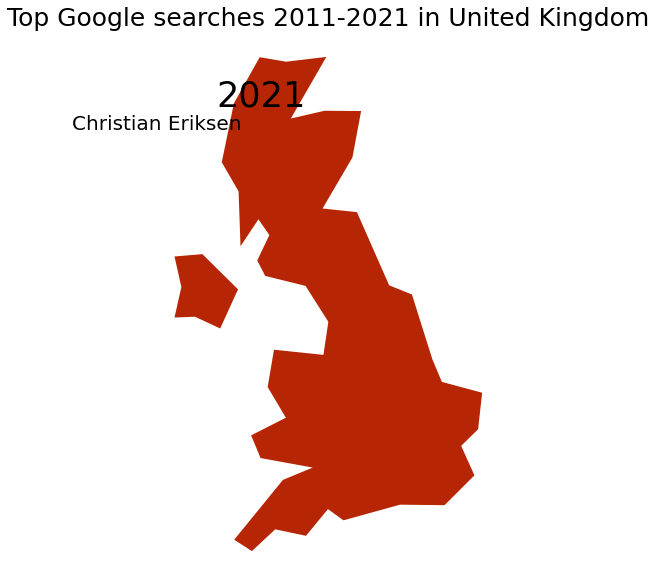

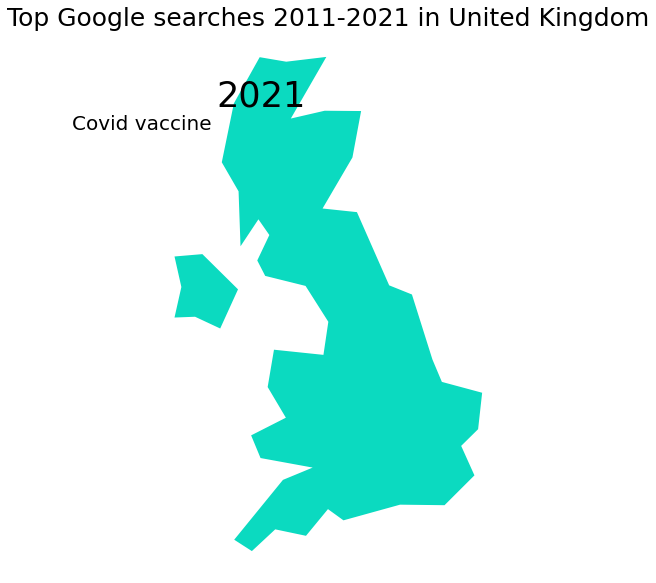

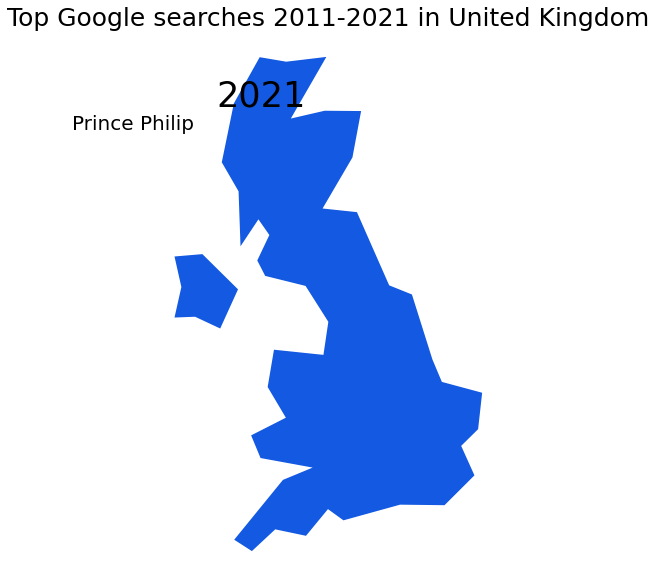

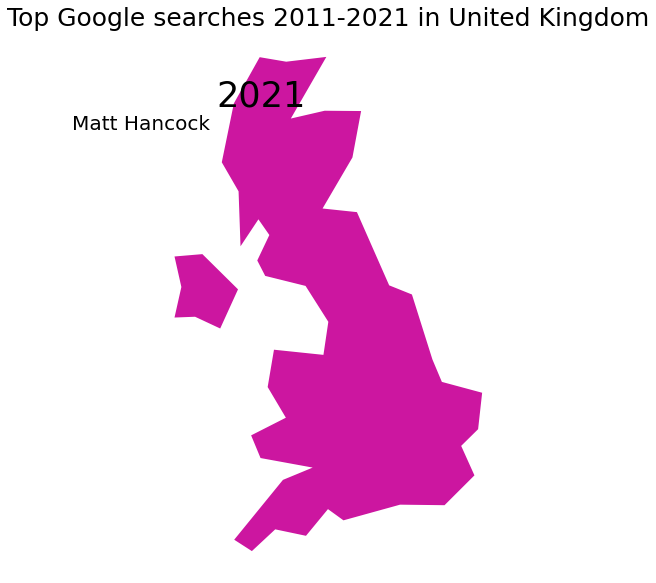

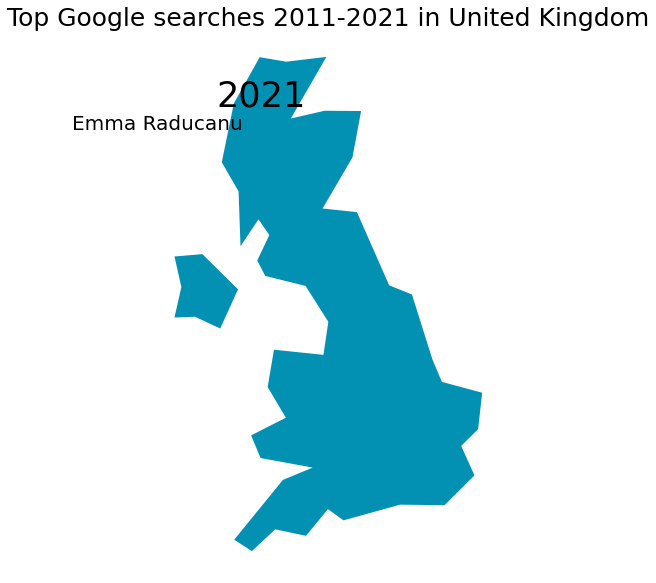

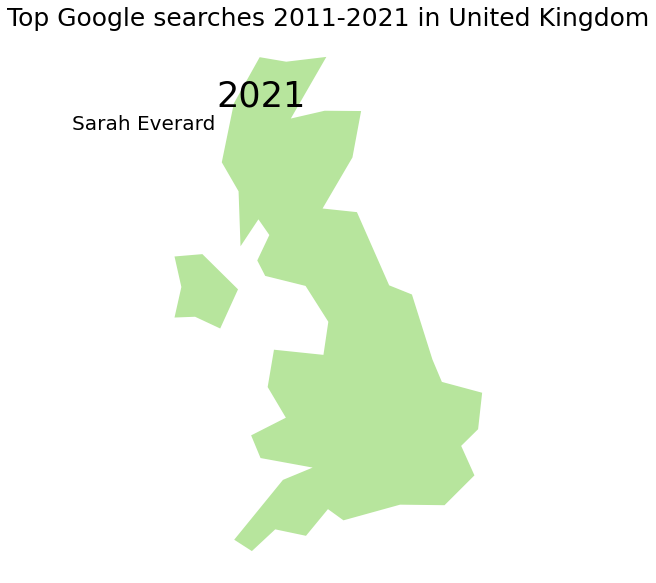

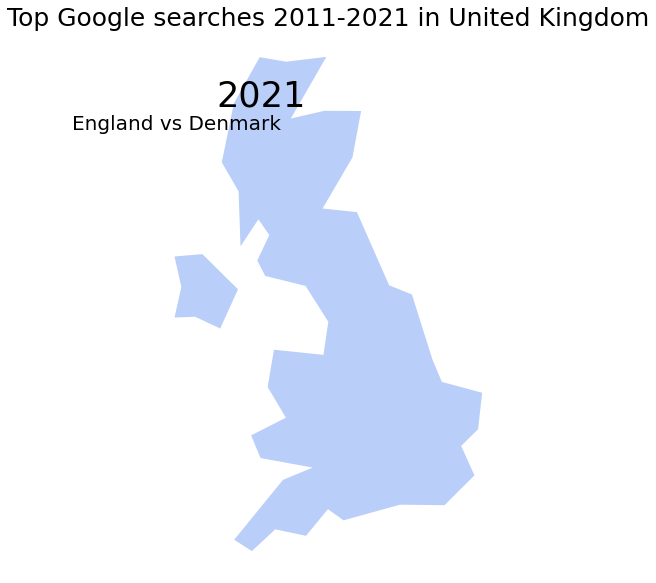

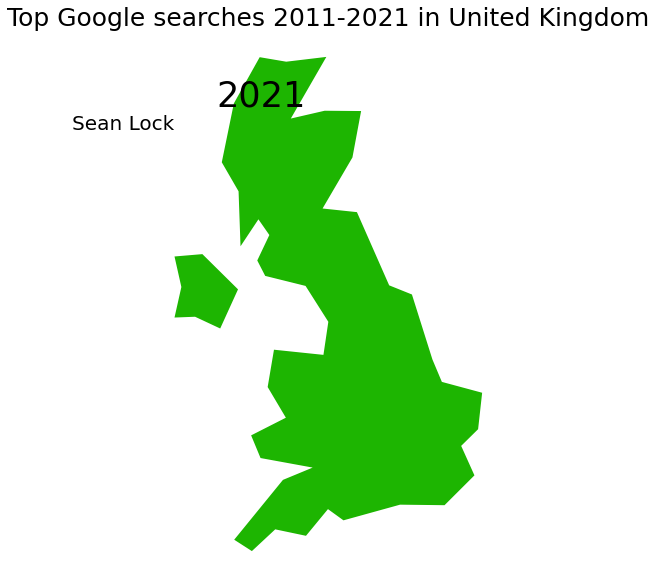

In [7]:
import pandas as pd
import geopandas as gpd
from pytrends.request import TrendReq
import random
import os
import sys

pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))

def to_csv(country, geo_code, start_year, end_year):
    path = 'datasets'
    filepath = os.path.join(path, str(country) + '.csv')
    if os.path.exists(filepath):
        return 
        
    for i in range(start_year, end_year+1):
        print(i)
        colors = []
        for j in range(0, 10):
            hexadecimal = "#" + ''.join([random.choice('ABCDEF0123456789') for k in range(6)])
            colors.append(hexadecimal)
            
        try:
            df=pytrends.top_charts(i, hl='en-US', tz=360, geo=geo_code)
        except IndexError:
            print("error")
            i += 1
            df = pytrends.top_charts(i, hl='en-US', tz=360, geo=geo_code)
        
        df.drop('exploreQuery', axis=1, inplace=True)
        df["year"]  = i
        df['color'] = colors
        if i == start_year:
            df.to_csv(filepath, encoding='utf-8', index=False, mode='w')
        else:
            df.to_csv(filepath, encoding='utf-8', index=False, mode='a')


def get_dataframe(filename):
    dataframe=pd.read_csv(filename)
    return dataframe

def main(country, geo_code, start_year, end_year):
    list_of_years = []
    for i in range(start_year, end_year+1):
        list_of_years.append(i)
    tmp = country.strip('" "')
    to_csv(tmp, geo_code, start_year, end_year)
    output_path = 'maps'
    final_directory = os.path.join(output_path, str(tmp))
    if not os.path.exists(final_directory):
       os.makedirs(final_directory)
    result = get_dataframe('datasets/'+str(tmp)+'.csv')
    for year in list_of_years:
        df = result.loc[result['year'] == str(year)]
        title = df['title'].tolist()
        color = df['color'].tolist()
        for string, color in zip(title, color):
            world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
            country_map = world.query('name ==' + country)
            fig = country_map.plot(figsize=(10, 10), color=color)
            fig.set_title('Top Google searches ' + str(start_year) + '-' + str(end_year) + ' in ' + str(tmp),
                          fontdict={'fontsize': '25',
                                    'fontweight': '3'})
            fig.axis('off')
            fig.annotate(year,
                         xy=(0.3, .7), xycoords='figure fraction',
                         horizontalalignment='left', verticalalignment='top',
                         fontsize=35)
            fig.annotate(string,
                         xy=(0.1, .65), xycoords='figure fraction',
                         horizontalalignment='left', verticalalignment='top',
                         fontsize=20)
            if "/" in string:
                string = string.replace("/","-")
            filepath = os.path.join(final_directory, str(year) + str(string) + '.jpg')
            top_search = fig.get_figure()
            top_search.savefig(filepath, dpi=300)
            
            
    
main('"United Kingdom"', 'GB', 2011, 2021)